In [1]:
%reset
from landlab.plot import imshow_grid
from landlab import RasterModelGrid, CLOSED_BOUNDARY, FIXED_VALUE_BOUNDARY
from landlab.components import FlowRouter, FastscapeEroder, LinearDiffuser
from matplotlib.pyplot import figure, show, plot, xlabel, ylabel, title
#from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from landlab.io import write_esri_ascii
%matplotlib inline 

import numpy as np

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


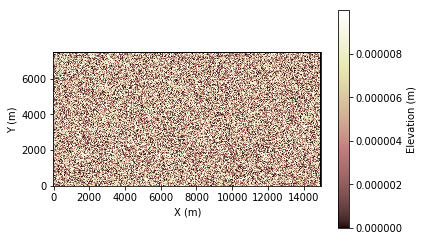

In [2]:
filenameHeader = "Fastscape_5Myr_100yrTimeStep_onemmyr"

rowsNum = 250 # number of raster cells in vertical direction (y)
colsNum = 500 # number of raster cells in horizontal direction (x)
dxy  = 30 # side length of a raster model cell, or resolution [m]
lengthKm = (dxy * rowsNum)/1000
widthKm = (dxy * colsNum)/1000

mg = RasterModelGrid((rowsNum, colsNum), dxy) # The grid is 200 rows by 100 columns, with dx = dy = 50 m.

for edge in (mg.nodes_at_left_edge, mg.nodes_at_right_edge, mg.nodes_at_top_edge):
             mg.status_at_node[edge] = CLOSED_BOUNDARY
for edge in (mg.nodes_at_bottom_edge):
             mg.status_at_node[edge] = FIXED_VALUE_BOUNDARY
        
z = mg.add_zeros('node', 'topographic__elevation')
initial_roughness = np.random.rand(mg.core_nodes.size)/100000.
mg.at_node['topographic__elevation'][mg.core_nodes] += initial_roughness


imshow_grid(mg, z, grid_units=['m','m'], var_name='Elevation (m)')  

In [3]:
total_t = 5000000. # years
dt = 10 # years
#postUplfitTime = 100000 # phase of no uplift after 10Ma
nt = int(total_t // dt) # number of time steps
#timeStepNumPostOrogen = int(postUplfitTime // dt)

uplift_rate = 0.001 # m/yr
uplift_per_step = uplift_rate * dt # depth (m) of uplift per timestep

In [4]:
K_sp=1E-5
m_sp=0.5
n_sp=1.0

fr = FlowRouter(mg, method='D8')
sp = FastscapeEroder(mg, K_sp=1E-5, m_sp=0.5, n_sp=1.0, threshold_sp=0., rainfall_intensity=1.)
                    
k_d = 0.05
lin_diffuse = LinearDiffuser(mg, linear_diffusivity=k_d )
#PerronNLDiffuse(mg, nonlinear_diffusivity=None, S_crit=30.*np.pi/180., rock_density=2700., sed_density=2700.)



In [5]:
meanElevationArray = []
timeArray = []
maxElevationArray =[]
zDiffArray=[]

for i in range(nt):
    
    zOld = mg.at_node['topographic__elevation'][mg.core_nodes]
    mg.at_node['topographic__elevation'][mg.core_nodes] += uplift_per_step # add uplift
    
    fr.run_one_step() # route flow
    sp.run_one_step(dt) # fluvial incision
    lin_diffuse.run_one_step(dt) # linear diffusion
    
    
    meanElevation = np.mean(z)
    maxElevation = np.max(z)
    timeArray.append(i*dt)
    meanElevationArray.append(meanElevation)
    maxElevationArray.append(maxElevation)
    
    zNew = mg.at_node['topographic__elevation'][mg.core_nodes]
    zDiff = np.subtract(zOld,zNew)
    zDiffArray.append(max(zDiff))
    
    if i % 20 == 0:
      print ("Completed loop ", i, " out of ", nt)
    
    #if i %10000 ==0:
        
        #filename = filenameHeader + "k_" + str(K_sp) + "_" + "m_" + str(m_sp) + "_" + "n_"+ str(n_sp) + "_" +\
        #"LinDiffusion_" + str(k_d) + "_" + str(widthKm) + "x" + str(lengthKm)+ "km_" + "30mRes" + str(i)+".txt"

        #write_esri_ascii(filename, mg, 'topographic__elevation')

('Completed loop ', 0, ' out of ', 500000)
('Completed loop ', 20, ' out of ', 500000)
('Completed loop ', 40, ' out of ', 500000)
('Completed loop ', 60, ' out of ', 500000)
('Completed loop ', 80, ' out of ', 500000)
('Completed loop ', 100, ' out of ', 500000)
('Completed loop ', 120, ' out of ', 500000)
('Completed loop ', 140, ' out of ', 500000)
('Completed loop ', 160, ' out of ', 500000)
('Completed loop ', 180, ' out of ', 500000)
('Completed loop ', 200, ' out of ', 500000)
('Completed loop ', 220, ' out of ', 500000)
('Completed loop ', 240, ' out of ', 500000)
('Completed loop ', 260, ' out of ', 500000)
('Completed loop ', 280, ' out of ', 500000)
('Completed loop ', 300, ' out of ', 500000)
('Completed loop ', 320, ' out of ', 500000)
('Completed loop ', 340, ' out of ', 500000)
('Completed loop ', 360, ' out of ', 500000)
('Completed loop ', 380, ' out of ', 500000)
('Completed loop ', 400, ' out of ', 500000)
('Completed loop ', 420, ' out of ', 500000)
('Completed loop

('Completed loop ', 3600, ' out of ', 500000)
('Completed loop ', 3620, ' out of ', 500000)
('Completed loop ', 3640, ' out of ', 500000)
('Completed loop ', 3660, ' out of ', 500000)
('Completed loop ', 3680, ' out of ', 500000)
('Completed loop ', 3700, ' out of ', 500000)
('Completed loop ', 3720, ' out of ', 500000)
('Completed loop ', 3740, ' out of ', 500000)
('Completed loop ', 3760, ' out of ', 500000)
('Completed loop ', 3780, ' out of ', 500000)
('Completed loop ', 3800, ' out of ', 500000)
('Completed loop ', 3820, ' out of ', 500000)
('Completed loop ', 3840, ' out of ', 500000)
('Completed loop ', 3860, ' out of ', 500000)
('Completed loop ', 3880, ' out of ', 500000)
('Completed loop ', 3900, ' out of ', 500000)
('Completed loop ', 3920, ' out of ', 500000)
('Completed loop ', 3940, ' out of ', 500000)
('Completed loop ', 3960, ' out of ', 500000)
('Completed loop ', 3980, ' out of ', 500000)
('Completed loop ', 4000, ' out of ', 500000)
('Completed loop ', 4020, ' out of

('Completed loop ', 7180, ' out of ', 500000)
('Completed loop ', 7200, ' out of ', 500000)
('Completed loop ', 7220, ' out of ', 500000)
('Completed loop ', 7240, ' out of ', 500000)
('Completed loop ', 7260, ' out of ', 500000)
('Completed loop ', 7280, ' out of ', 500000)
('Completed loop ', 7300, ' out of ', 500000)
('Completed loop ', 7320, ' out of ', 500000)
('Completed loop ', 7340, ' out of ', 500000)
('Completed loop ', 7360, ' out of ', 500000)
('Completed loop ', 7380, ' out of ', 500000)
('Completed loop ', 7400, ' out of ', 500000)
('Completed loop ', 7420, ' out of ', 500000)
('Completed loop ', 7440, ' out of ', 500000)
('Completed loop ', 7460, ' out of ', 500000)
('Completed loop ', 7480, ' out of ', 500000)
('Completed loop ', 7500, ' out of ', 500000)
('Completed loop ', 7520, ' out of ', 500000)
('Completed loop ', 7540, ' out of ', 500000)
('Completed loop ', 7560, ' out of ', 500000)
('Completed loop ', 7580, ' out of ', 500000)
('Completed loop ', 7600, ' out of

('Completed loop ', 10740, ' out of ', 500000)
('Completed loop ', 10760, ' out of ', 500000)
('Completed loop ', 10780, ' out of ', 500000)
('Completed loop ', 10800, ' out of ', 500000)
('Completed loop ', 10820, ' out of ', 500000)
('Completed loop ', 10840, ' out of ', 500000)
('Completed loop ', 10860, ' out of ', 500000)
('Completed loop ', 10880, ' out of ', 500000)
('Completed loop ', 10900, ' out of ', 500000)
('Completed loop ', 10920, ' out of ', 500000)
('Completed loop ', 10940, ' out of ', 500000)
('Completed loop ', 10960, ' out of ', 500000)
('Completed loop ', 10980, ' out of ', 500000)
('Completed loop ', 11000, ' out of ', 500000)
('Completed loop ', 11020, ' out of ', 500000)
('Completed loop ', 11040, ' out of ', 500000)
('Completed loop ', 11060, ' out of ', 500000)
('Completed loop ', 11080, ' out of ', 500000)
('Completed loop ', 11100, ' out of ', 500000)
('Completed loop ', 11120, ' out of ', 500000)
('Completed loop ', 11140, ' out of ', 500000)
('Completed l

('Completed loop ', 14240, ' out of ', 500000)
('Completed loop ', 14260, ' out of ', 500000)
('Completed loop ', 14280, ' out of ', 500000)
('Completed loop ', 14300, ' out of ', 500000)
('Completed loop ', 14320, ' out of ', 500000)
('Completed loop ', 14340, ' out of ', 500000)
('Completed loop ', 14360, ' out of ', 500000)
('Completed loop ', 14380, ' out of ', 500000)
('Completed loop ', 14400, ' out of ', 500000)
('Completed loop ', 14420, ' out of ', 500000)
('Completed loop ', 14440, ' out of ', 500000)
('Completed loop ', 14460, ' out of ', 500000)
('Completed loop ', 14480, ' out of ', 500000)
('Completed loop ', 14500, ' out of ', 500000)
('Completed loop ', 14520, ' out of ', 500000)
('Completed loop ', 14540, ' out of ', 500000)
('Completed loop ', 14560, ' out of ', 500000)
('Completed loop ', 14580, ' out of ', 500000)
('Completed loop ', 14600, ' out of ', 500000)
('Completed loop ', 14620, ' out of ', 500000)
('Completed loop ', 14640, ' out of ', 500000)
('Completed l

('Completed loop ', 17740, ' out of ', 500000)
('Completed loop ', 17760, ' out of ', 500000)
('Completed loop ', 17780, ' out of ', 500000)
('Completed loop ', 17800, ' out of ', 500000)
('Completed loop ', 17820, ' out of ', 500000)
('Completed loop ', 17840, ' out of ', 500000)
('Completed loop ', 17860, ' out of ', 500000)
('Completed loop ', 17880, ' out of ', 500000)
('Completed loop ', 17900, ' out of ', 500000)
('Completed loop ', 17920, ' out of ', 500000)
('Completed loop ', 17940, ' out of ', 500000)
('Completed loop ', 17960, ' out of ', 500000)
('Completed loop ', 17980, ' out of ', 500000)
('Completed loop ', 18000, ' out of ', 500000)
('Completed loop ', 18020, ' out of ', 500000)
('Completed loop ', 18040, ' out of ', 500000)
('Completed loop ', 18060, ' out of ', 500000)
('Completed loop ', 18080, ' out of ', 500000)
('Completed loop ', 18100, ' out of ', 500000)
('Completed loop ', 18120, ' out of ', 500000)
('Completed loop ', 18140, ' out of ', 500000)
('Completed l

('Completed loop ', 21240, ' out of ', 500000)
('Completed loop ', 21260, ' out of ', 500000)
('Completed loop ', 21280, ' out of ', 500000)
('Completed loop ', 21300, ' out of ', 500000)
('Completed loop ', 21320, ' out of ', 500000)
('Completed loop ', 21340, ' out of ', 500000)
('Completed loop ', 21360, ' out of ', 500000)
('Completed loop ', 21380, ' out of ', 500000)
('Completed loop ', 21400, ' out of ', 500000)
('Completed loop ', 21420, ' out of ', 500000)
('Completed loop ', 21440, ' out of ', 500000)
('Completed loop ', 21460, ' out of ', 500000)
('Completed loop ', 21480, ' out of ', 500000)
('Completed loop ', 21500, ' out of ', 500000)
('Completed loop ', 21520, ' out of ', 500000)
('Completed loop ', 21540, ' out of ', 500000)
('Completed loop ', 21560, ' out of ', 500000)
('Completed loop ', 21580, ' out of ', 500000)
('Completed loop ', 21600, ' out of ', 500000)
('Completed loop ', 21620, ' out of ', 500000)
('Completed loop ', 21640, ' out of ', 500000)
('Completed l

('Completed loop ', 24740, ' out of ', 500000)
('Completed loop ', 24760, ' out of ', 500000)
('Completed loop ', 24780, ' out of ', 500000)
('Completed loop ', 24800, ' out of ', 500000)
('Completed loop ', 24820, ' out of ', 500000)
('Completed loop ', 24840, ' out of ', 500000)
('Completed loop ', 24860, ' out of ', 500000)
('Completed loop ', 24880, ' out of ', 500000)
('Completed loop ', 24900, ' out of ', 500000)
('Completed loop ', 24920, ' out of ', 500000)
('Completed loop ', 24940, ' out of ', 500000)
('Completed loop ', 24960, ' out of ', 500000)
('Completed loop ', 24980, ' out of ', 500000)
('Completed loop ', 25000, ' out of ', 500000)
('Completed loop ', 25020, ' out of ', 500000)
('Completed loop ', 25040, ' out of ', 500000)
('Completed loop ', 25060, ' out of ', 500000)
('Completed loop ', 25080, ' out of ', 500000)
('Completed loop ', 25100, ' out of ', 500000)
('Completed loop ', 25120, ' out of ', 500000)
('Completed loop ', 25140, ' out of ', 500000)
('Completed l

('Completed loop ', 28240, ' out of ', 500000)
('Completed loop ', 28260, ' out of ', 500000)
('Completed loop ', 28280, ' out of ', 500000)
('Completed loop ', 28300, ' out of ', 500000)
('Completed loop ', 28320, ' out of ', 500000)
('Completed loop ', 28340, ' out of ', 500000)
('Completed loop ', 28360, ' out of ', 500000)
('Completed loop ', 28380, ' out of ', 500000)
('Completed loop ', 28400, ' out of ', 500000)
('Completed loop ', 28420, ' out of ', 500000)
('Completed loop ', 28440, ' out of ', 500000)
('Completed loop ', 28460, ' out of ', 500000)
('Completed loop ', 28480, ' out of ', 500000)
('Completed loop ', 28500, ' out of ', 500000)
('Completed loop ', 28520, ' out of ', 500000)
('Completed loop ', 28540, ' out of ', 500000)
('Completed loop ', 28560, ' out of ', 500000)
('Completed loop ', 28580, ' out of ', 500000)
('Completed loop ', 28600, ' out of ', 500000)
('Completed loop ', 28620, ' out of ', 500000)
('Completed loop ', 28640, ' out of ', 500000)
('Completed l

('Completed loop ', 31740, ' out of ', 500000)
('Completed loop ', 31760, ' out of ', 500000)
('Completed loop ', 31780, ' out of ', 500000)
('Completed loop ', 31800, ' out of ', 500000)
('Completed loop ', 31820, ' out of ', 500000)
('Completed loop ', 31840, ' out of ', 500000)
('Completed loop ', 31860, ' out of ', 500000)
('Completed loop ', 31880, ' out of ', 500000)
('Completed loop ', 31900, ' out of ', 500000)
('Completed loop ', 31920, ' out of ', 500000)
('Completed loop ', 31940, ' out of ', 500000)
('Completed loop ', 31960, ' out of ', 500000)
('Completed loop ', 31980, ' out of ', 500000)
('Completed loop ', 32000, ' out of ', 500000)
('Completed loop ', 32020, ' out of ', 500000)
('Completed loop ', 32040, ' out of ', 500000)
('Completed loop ', 32060, ' out of ', 500000)
('Completed loop ', 32080, ' out of ', 500000)
('Completed loop ', 32100, ' out of ', 500000)
('Completed loop ', 32120, ' out of ', 500000)
('Completed loop ', 32140, ' out of ', 500000)
('Completed l

('Completed loop ', 35240, ' out of ', 500000)
('Completed loop ', 35260, ' out of ', 500000)
('Completed loop ', 35280, ' out of ', 500000)
('Completed loop ', 35300, ' out of ', 500000)
('Completed loop ', 35320, ' out of ', 500000)
('Completed loop ', 35340, ' out of ', 500000)
('Completed loop ', 35360, ' out of ', 500000)
('Completed loop ', 35380, ' out of ', 500000)
('Completed loop ', 35400, ' out of ', 500000)
('Completed loop ', 35420, ' out of ', 500000)
('Completed loop ', 35440, ' out of ', 500000)
('Completed loop ', 35460, ' out of ', 500000)
('Completed loop ', 35480, ' out of ', 500000)
('Completed loop ', 35500, ' out of ', 500000)
('Completed loop ', 35520, ' out of ', 500000)
('Completed loop ', 35540, ' out of ', 500000)
('Completed loop ', 35560, ' out of ', 500000)
('Completed loop ', 35580, ' out of ', 500000)
('Completed loop ', 35600, ' out of ', 500000)
('Completed loop ', 35620, ' out of ', 500000)
('Completed loop ', 35640, ' out of ', 500000)
('Completed l

('Completed loop ', 38740, ' out of ', 500000)
('Completed loop ', 38760, ' out of ', 500000)
('Completed loop ', 38780, ' out of ', 500000)
('Completed loop ', 38800, ' out of ', 500000)
('Completed loop ', 38820, ' out of ', 500000)
('Completed loop ', 38840, ' out of ', 500000)
('Completed loop ', 38860, ' out of ', 500000)
('Completed loop ', 38880, ' out of ', 500000)
('Completed loop ', 38900, ' out of ', 500000)
('Completed loop ', 38920, ' out of ', 500000)
('Completed loop ', 38940, ' out of ', 500000)
('Completed loop ', 38960, ' out of ', 500000)
('Completed loop ', 38980, ' out of ', 500000)
('Completed loop ', 39000, ' out of ', 500000)
('Completed loop ', 39020, ' out of ', 500000)
('Completed loop ', 39040, ' out of ', 500000)
('Completed loop ', 39060, ' out of ', 500000)
('Completed loop ', 39080, ' out of ', 500000)
('Completed loop ', 39100, ' out of ', 500000)
('Completed loop ', 39120, ' out of ', 500000)
('Completed loop ', 39140, ' out of ', 500000)
('Completed l

('Completed loop ', 42240, ' out of ', 500000)
('Completed loop ', 42260, ' out of ', 500000)
('Completed loop ', 42280, ' out of ', 500000)
('Completed loop ', 42300, ' out of ', 500000)
('Completed loop ', 42320, ' out of ', 500000)
('Completed loop ', 42340, ' out of ', 500000)
('Completed loop ', 42360, ' out of ', 500000)
('Completed loop ', 42380, ' out of ', 500000)
('Completed loop ', 42400, ' out of ', 500000)
('Completed loop ', 42420, ' out of ', 500000)
('Completed loop ', 42440, ' out of ', 500000)
('Completed loop ', 42460, ' out of ', 500000)
('Completed loop ', 42480, ' out of ', 500000)
('Completed loop ', 42500, ' out of ', 500000)
('Completed loop ', 42520, ' out of ', 500000)
('Completed loop ', 42540, ' out of ', 500000)
('Completed loop ', 42560, ' out of ', 500000)
('Completed loop ', 42580, ' out of ', 500000)
('Completed loop ', 42600, ' out of ', 500000)
('Completed loop ', 42620, ' out of ', 500000)
('Completed loop ', 42640, ' out of ', 500000)
('Completed l

('Completed loop ', 45740, ' out of ', 500000)
('Completed loop ', 45760, ' out of ', 500000)
('Completed loop ', 45780, ' out of ', 500000)
('Completed loop ', 45800, ' out of ', 500000)
('Completed loop ', 45820, ' out of ', 500000)
('Completed loop ', 45840, ' out of ', 500000)
('Completed loop ', 45860, ' out of ', 500000)
('Completed loop ', 45880, ' out of ', 500000)
('Completed loop ', 45900, ' out of ', 500000)
('Completed loop ', 45920, ' out of ', 500000)
('Completed loop ', 45940, ' out of ', 500000)
('Completed loop ', 45960, ' out of ', 500000)
('Completed loop ', 45980, ' out of ', 500000)
('Completed loop ', 46000, ' out of ', 500000)
('Completed loop ', 46020, ' out of ', 500000)
('Completed loop ', 46040, ' out of ', 500000)
('Completed loop ', 46060, ' out of ', 500000)
('Completed loop ', 46080, ' out of ', 500000)
('Completed loop ', 46100, ' out of ', 500000)
('Completed loop ', 46120, ' out of ', 500000)
('Completed loop ', 46140, ' out of ', 500000)
('Completed l

('Completed loop ', 49240, ' out of ', 500000)
('Completed loop ', 49260, ' out of ', 500000)
('Completed loop ', 49280, ' out of ', 500000)
('Completed loop ', 49300, ' out of ', 500000)
('Completed loop ', 49320, ' out of ', 500000)
('Completed loop ', 49340, ' out of ', 500000)
('Completed loop ', 49360, ' out of ', 500000)
('Completed loop ', 49380, ' out of ', 500000)
('Completed loop ', 49400, ' out of ', 500000)
('Completed loop ', 49420, ' out of ', 500000)
('Completed loop ', 49440, ' out of ', 500000)
('Completed loop ', 49460, ' out of ', 500000)
('Completed loop ', 49480, ' out of ', 500000)
('Completed loop ', 49500, ' out of ', 500000)
('Completed loop ', 49520, ' out of ', 500000)
('Completed loop ', 49540, ' out of ', 500000)
('Completed loop ', 49560, ' out of ', 500000)
('Completed loop ', 49580, ' out of ', 500000)
('Completed loop ', 49600, ' out of ', 500000)
('Completed loop ', 49620, ' out of ', 500000)
('Completed loop ', 49640, ' out of ', 500000)
('Completed l

('Completed loop ', 52740, ' out of ', 500000)
('Completed loop ', 52760, ' out of ', 500000)
('Completed loop ', 52780, ' out of ', 500000)
('Completed loop ', 52800, ' out of ', 500000)
('Completed loop ', 52820, ' out of ', 500000)
('Completed loop ', 52840, ' out of ', 500000)
('Completed loop ', 52860, ' out of ', 500000)
('Completed loop ', 52880, ' out of ', 500000)
('Completed loop ', 52900, ' out of ', 500000)
('Completed loop ', 52920, ' out of ', 500000)
('Completed loop ', 52940, ' out of ', 500000)
('Completed loop ', 52960, ' out of ', 500000)
('Completed loop ', 52980, ' out of ', 500000)
('Completed loop ', 53000, ' out of ', 500000)
('Completed loop ', 53020, ' out of ', 500000)
('Completed loop ', 53040, ' out of ', 500000)
('Completed loop ', 53060, ' out of ', 500000)
('Completed loop ', 53080, ' out of ', 500000)
('Completed loop ', 53100, ' out of ', 500000)
('Completed loop ', 53120, ' out of ', 500000)
('Completed loop ', 53140, ' out of ', 500000)
('Completed l

('Completed loop ', 56240, ' out of ', 500000)
('Completed loop ', 56260, ' out of ', 500000)
('Completed loop ', 56280, ' out of ', 500000)
('Completed loop ', 56300, ' out of ', 500000)
('Completed loop ', 56320, ' out of ', 500000)
('Completed loop ', 56340, ' out of ', 500000)
('Completed loop ', 56360, ' out of ', 500000)
('Completed loop ', 56380, ' out of ', 500000)
('Completed loop ', 56400, ' out of ', 500000)
('Completed loop ', 56420, ' out of ', 500000)
('Completed loop ', 56440, ' out of ', 500000)
('Completed loop ', 56460, ' out of ', 500000)
('Completed loop ', 56480, ' out of ', 500000)
('Completed loop ', 56500, ' out of ', 500000)
('Completed loop ', 56520, ' out of ', 500000)
('Completed loop ', 56540, ' out of ', 500000)
('Completed loop ', 56560, ' out of ', 500000)
('Completed loop ', 56580, ' out of ', 500000)
('Completed loop ', 56600, ' out of ', 500000)
('Completed loop ', 56620, ' out of ', 500000)
('Completed loop ', 56640, ' out of ', 500000)
('Completed l

('Completed loop ', 59740, ' out of ', 500000)
('Completed loop ', 59760, ' out of ', 500000)
('Completed loop ', 59780, ' out of ', 500000)
('Completed loop ', 59800, ' out of ', 500000)
('Completed loop ', 59820, ' out of ', 500000)
('Completed loop ', 59840, ' out of ', 500000)
('Completed loop ', 59860, ' out of ', 500000)
('Completed loop ', 59880, ' out of ', 500000)
('Completed loop ', 59900, ' out of ', 500000)
('Completed loop ', 59920, ' out of ', 500000)
('Completed loop ', 59940, ' out of ', 500000)
('Completed loop ', 59960, ' out of ', 500000)
('Completed loop ', 59980, ' out of ', 500000)
('Completed loop ', 60000, ' out of ', 500000)
('Completed loop ', 60020, ' out of ', 500000)
('Completed loop ', 60040, ' out of ', 500000)
('Completed loop ', 60060, ' out of ', 500000)
('Completed loop ', 60080, ' out of ', 500000)
('Completed loop ', 60100, ' out of ', 500000)
('Completed loop ', 60120, ' out of ', 500000)
('Completed loop ', 60140, ' out of ', 500000)
('Completed l

('Completed loop ', 63240, ' out of ', 500000)
('Completed loop ', 63260, ' out of ', 500000)
('Completed loop ', 63280, ' out of ', 500000)
('Completed loop ', 63300, ' out of ', 500000)
('Completed loop ', 63320, ' out of ', 500000)
('Completed loop ', 63340, ' out of ', 500000)
('Completed loop ', 63360, ' out of ', 500000)
('Completed loop ', 63380, ' out of ', 500000)
('Completed loop ', 63400, ' out of ', 500000)
('Completed loop ', 63420, ' out of ', 500000)
('Completed loop ', 63440, ' out of ', 500000)
('Completed loop ', 63460, ' out of ', 500000)
('Completed loop ', 63480, ' out of ', 500000)
('Completed loop ', 63500, ' out of ', 500000)
('Completed loop ', 63520, ' out of ', 500000)
('Completed loop ', 63540, ' out of ', 500000)
('Completed loop ', 63560, ' out of ', 500000)
('Completed loop ', 63580, ' out of ', 500000)
('Completed loop ', 63600, ' out of ', 500000)
('Completed loop ', 63620, ' out of ', 500000)
('Completed loop ', 63640, ' out of ', 500000)
('Completed l

('Completed loop ', 66740, ' out of ', 500000)
('Completed loop ', 66760, ' out of ', 500000)
('Completed loop ', 66780, ' out of ', 500000)
('Completed loop ', 66800, ' out of ', 500000)
('Completed loop ', 66820, ' out of ', 500000)
('Completed loop ', 66840, ' out of ', 500000)
('Completed loop ', 66860, ' out of ', 500000)
('Completed loop ', 66880, ' out of ', 500000)
('Completed loop ', 66900, ' out of ', 500000)
('Completed loop ', 66920, ' out of ', 500000)
('Completed loop ', 66940, ' out of ', 500000)
('Completed loop ', 66960, ' out of ', 500000)
('Completed loop ', 66980, ' out of ', 500000)
('Completed loop ', 67000, ' out of ', 500000)
('Completed loop ', 67020, ' out of ', 500000)
('Completed loop ', 67040, ' out of ', 500000)
('Completed loop ', 67060, ' out of ', 500000)
('Completed loop ', 67080, ' out of ', 500000)
('Completed loop ', 67100, ' out of ', 500000)
('Completed loop ', 67120, ' out of ', 500000)
('Completed loop ', 67140, ' out of ', 500000)
('Completed l

('Completed loop ', 70240, ' out of ', 500000)
('Completed loop ', 70260, ' out of ', 500000)
('Completed loop ', 70280, ' out of ', 500000)
('Completed loop ', 70300, ' out of ', 500000)
('Completed loop ', 70320, ' out of ', 500000)
('Completed loop ', 70340, ' out of ', 500000)
('Completed loop ', 70360, ' out of ', 500000)
('Completed loop ', 70380, ' out of ', 500000)
('Completed loop ', 70400, ' out of ', 500000)
('Completed loop ', 70420, ' out of ', 500000)
('Completed loop ', 70440, ' out of ', 500000)
('Completed loop ', 70460, ' out of ', 500000)
('Completed loop ', 70480, ' out of ', 500000)
('Completed loop ', 70500, ' out of ', 500000)
('Completed loop ', 70520, ' out of ', 500000)
('Completed loop ', 70540, ' out of ', 500000)
('Completed loop ', 70560, ' out of ', 500000)
('Completed loop ', 70580, ' out of ', 500000)
('Completed loop ', 70600, ' out of ', 500000)
('Completed loop ', 70620, ' out of ', 500000)
('Completed loop ', 70640, ' out of ', 500000)
('Completed l

('Completed loop ', 73740, ' out of ', 500000)
('Completed loop ', 73760, ' out of ', 500000)
('Completed loop ', 73780, ' out of ', 500000)
('Completed loop ', 73800, ' out of ', 500000)
('Completed loop ', 73820, ' out of ', 500000)
('Completed loop ', 73840, ' out of ', 500000)
('Completed loop ', 73860, ' out of ', 500000)
('Completed loop ', 73880, ' out of ', 500000)
('Completed loop ', 73900, ' out of ', 500000)
('Completed loop ', 73920, ' out of ', 500000)
('Completed loop ', 73940, ' out of ', 500000)
('Completed loop ', 73960, ' out of ', 500000)
('Completed loop ', 73980, ' out of ', 500000)
('Completed loop ', 74000, ' out of ', 500000)
('Completed loop ', 74020, ' out of ', 500000)
('Completed loop ', 74040, ' out of ', 500000)
('Completed loop ', 74060, ' out of ', 500000)
('Completed loop ', 74080, ' out of ', 500000)
('Completed loop ', 74100, ' out of ', 500000)
('Completed loop ', 74120, ' out of ', 500000)
('Completed loop ', 74140, ' out of ', 500000)
('Completed l

('Completed loop ', 77240, ' out of ', 500000)
('Completed loop ', 77260, ' out of ', 500000)
('Completed loop ', 77280, ' out of ', 500000)
('Completed loop ', 77300, ' out of ', 500000)
('Completed loop ', 77320, ' out of ', 500000)
('Completed loop ', 77340, ' out of ', 500000)
('Completed loop ', 77360, ' out of ', 500000)
('Completed loop ', 77380, ' out of ', 500000)
('Completed loop ', 77400, ' out of ', 500000)
('Completed loop ', 77420, ' out of ', 500000)
('Completed loop ', 77440, ' out of ', 500000)
('Completed loop ', 77460, ' out of ', 500000)
('Completed loop ', 77480, ' out of ', 500000)
('Completed loop ', 77500, ' out of ', 500000)
('Completed loop ', 77520, ' out of ', 500000)
('Completed loop ', 77540, ' out of ', 500000)
('Completed loop ', 77560, ' out of ', 500000)
('Completed loop ', 77580, ' out of ', 500000)
('Completed loop ', 77600, ' out of ', 500000)
('Completed loop ', 77620, ' out of ', 500000)
('Completed loop ', 77640, ' out of ', 500000)
('Completed l

('Completed loop ', 80740, ' out of ', 500000)
('Completed loop ', 80760, ' out of ', 500000)
('Completed loop ', 80780, ' out of ', 500000)
('Completed loop ', 80800, ' out of ', 500000)
('Completed loop ', 80820, ' out of ', 500000)
('Completed loop ', 80840, ' out of ', 500000)
('Completed loop ', 80860, ' out of ', 500000)
('Completed loop ', 80880, ' out of ', 500000)
('Completed loop ', 80900, ' out of ', 500000)
('Completed loop ', 80920, ' out of ', 500000)
('Completed loop ', 80940, ' out of ', 500000)
('Completed loop ', 80960, ' out of ', 500000)
('Completed loop ', 80980, ' out of ', 500000)
('Completed loop ', 81000, ' out of ', 500000)
('Completed loop ', 81020, ' out of ', 500000)
('Completed loop ', 81040, ' out of ', 500000)
('Completed loop ', 81060, ' out of ', 500000)
('Completed loop ', 81080, ' out of ', 500000)
('Completed loop ', 81100, ' out of ', 500000)
('Completed loop ', 81120, ' out of ', 500000)
('Completed loop ', 81140, ' out of ', 500000)
('Completed l

('Completed loop ', 84240, ' out of ', 500000)
('Completed loop ', 84260, ' out of ', 500000)
('Completed loop ', 84280, ' out of ', 500000)
('Completed loop ', 84300, ' out of ', 500000)
('Completed loop ', 84320, ' out of ', 500000)
('Completed loop ', 84340, ' out of ', 500000)
('Completed loop ', 84360, ' out of ', 500000)
('Completed loop ', 84380, ' out of ', 500000)
('Completed loop ', 84400, ' out of ', 500000)
('Completed loop ', 84420, ' out of ', 500000)
('Completed loop ', 84440, ' out of ', 500000)
('Completed loop ', 84460, ' out of ', 500000)
('Completed loop ', 84480, ' out of ', 500000)
('Completed loop ', 84500, ' out of ', 500000)
('Completed loop ', 84520, ' out of ', 500000)
('Completed loop ', 84540, ' out of ', 500000)
('Completed loop ', 84560, ' out of ', 500000)
('Completed loop ', 84580, ' out of ', 500000)
('Completed loop ', 84600, ' out of ', 500000)
('Completed loop ', 84620, ' out of ', 500000)
('Completed loop ', 84640, ' out of ', 500000)
('Completed l

('Completed loop ', 87740, ' out of ', 500000)
('Completed loop ', 87760, ' out of ', 500000)
('Completed loop ', 87780, ' out of ', 500000)
('Completed loop ', 87800, ' out of ', 500000)
('Completed loop ', 87820, ' out of ', 500000)
('Completed loop ', 87840, ' out of ', 500000)
('Completed loop ', 87860, ' out of ', 500000)
('Completed loop ', 87880, ' out of ', 500000)
('Completed loop ', 87900, ' out of ', 500000)
('Completed loop ', 87920, ' out of ', 500000)
('Completed loop ', 87940, ' out of ', 500000)
('Completed loop ', 87960, ' out of ', 500000)
('Completed loop ', 87980, ' out of ', 500000)
('Completed loop ', 88000, ' out of ', 500000)
('Completed loop ', 88020, ' out of ', 500000)
('Completed loop ', 88040, ' out of ', 500000)
('Completed loop ', 88060, ' out of ', 500000)
('Completed loop ', 88080, ' out of ', 500000)
('Completed loop ', 88100, ' out of ', 500000)
('Completed loop ', 88120, ' out of ', 500000)
('Completed loop ', 88140, ' out of ', 500000)
('Completed l

('Completed loop ', 91240, ' out of ', 500000)
('Completed loop ', 91260, ' out of ', 500000)
('Completed loop ', 91280, ' out of ', 500000)
('Completed loop ', 91300, ' out of ', 500000)
('Completed loop ', 91320, ' out of ', 500000)
('Completed loop ', 91340, ' out of ', 500000)
('Completed loop ', 91360, ' out of ', 500000)
('Completed loop ', 91380, ' out of ', 500000)
('Completed loop ', 91400, ' out of ', 500000)
('Completed loop ', 91420, ' out of ', 500000)
('Completed loop ', 91440, ' out of ', 500000)
('Completed loop ', 91460, ' out of ', 500000)
('Completed loop ', 91480, ' out of ', 500000)
('Completed loop ', 91500, ' out of ', 500000)
('Completed loop ', 91520, ' out of ', 500000)
('Completed loop ', 91540, ' out of ', 500000)
('Completed loop ', 91560, ' out of ', 500000)
('Completed loop ', 91580, ' out of ', 500000)
('Completed loop ', 91600, ' out of ', 500000)
('Completed loop ', 91620, ' out of ', 500000)
('Completed loop ', 91640, ' out of ', 500000)
('Completed l

('Completed loop ', 94740, ' out of ', 500000)
('Completed loop ', 94760, ' out of ', 500000)
('Completed loop ', 94780, ' out of ', 500000)
('Completed loop ', 94800, ' out of ', 500000)
('Completed loop ', 94820, ' out of ', 500000)
('Completed loop ', 94840, ' out of ', 500000)
('Completed loop ', 94860, ' out of ', 500000)
('Completed loop ', 94880, ' out of ', 500000)
('Completed loop ', 94900, ' out of ', 500000)
('Completed loop ', 94920, ' out of ', 500000)
('Completed loop ', 94940, ' out of ', 500000)
('Completed loop ', 94960, ' out of ', 500000)
('Completed loop ', 94980, ' out of ', 500000)
('Completed loop ', 95000, ' out of ', 500000)
('Completed loop ', 95020, ' out of ', 500000)
('Completed loop ', 95040, ' out of ', 500000)
('Completed loop ', 95060, ' out of ', 500000)
('Completed loop ', 95080, ' out of ', 500000)
('Completed loop ', 95100, ' out of ', 500000)
('Completed loop ', 95120, ' out of ', 500000)
('Completed loop ', 95140, ' out of ', 500000)
('Completed l

('Completed loop ', 98240, ' out of ', 500000)
('Completed loop ', 98260, ' out of ', 500000)
('Completed loop ', 98280, ' out of ', 500000)
('Completed loop ', 98300, ' out of ', 500000)
('Completed loop ', 98320, ' out of ', 500000)
('Completed loop ', 98340, ' out of ', 500000)
('Completed loop ', 98360, ' out of ', 500000)
('Completed loop ', 98380, ' out of ', 500000)
('Completed loop ', 98400, ' out of ', 500000)
('Completed loop ', 98420, ' out of ', 500000)
('Completed loop ', 98440, ' out of ', 500000)
('Completed loop ', 98460, ' out of ', 500000)
('Completed loop ', 98480, ' out of ', 500000)
('Completed loop ', 98500, ' out of ', 500000)
('Completed loop ', 98520, ' out of ', 500000)
('Completed loop ', 98540, ' out of ', 500000)
('Completed loop ', 98560, ' out of ', 500000)
('Completed loop ', 98580, ' out of ', 500000)
('Completed loop ', 98600, ' out of ', 500000)
('Completed loop ', 98620, ' out of ', 500000)
('Completed loop ', 98640, ' out of ', 500000)
('Completed l

('Completed loop ', 101700, ' out of ', 500000)
('Completed loop ', 101720, ' out of ', 500000)
('Completed loop ', 101740, ' out of ', 500000)
('Completed loop ', 101760, ' out of ', 500000)
('Completed loop ', 101780, ' out of ', 500000)
('Completed loop ', 101800, ' out of ', 500000)
('Completed loop ', 101820, ' out of ', 500000)
('Completed loop ', 101840, ' out of ', 500000)
('Completed loop ', 101860, ' out of ', 500000)
('Completed loop ', 101880, ' out of ', 500000)
('Completed loop ', 101900, ' out of ', 500000)
('Completed loop ', 101920, ' out of ', 500000)
('Completed loop ', 101940, ' out of ', 500000)
('Completed loop ', 101960, ' out of ', 500000)
('Completed loop ', 101980, ' out of ', 500000)
('Completed loop ', 102000, ' out of ', 500000)
('Completed loop ', 102020, ' out of ', 500000)
('Completed loop ', 102040, ' out of ', 500000)
('Completed loop ', 102060, ' out of ', 500000)
('Completed loop ', 102080, ' out of ', 500000)
('Completed loop ', 102100, ' out of ', 

('Completed loop ', 105120, ' out of ', 500000)
('Completed loop ', 105140, ' out of ', 500000)
('Completed loop ', 105160, ' out of ', 500000)
('Completed loop ', 105180, ' out of ', 500000)
('Completed loop ', 105200, ' out of ', 500000)
('Completed loop ', 105220, ' out of ', 500000)
('Completed loop ', 105240, ' out of ', 500000)
('Completed loop ', 105260, ' out of ', 500000)
('Completed loop ', 105280, ' out of ', 500000)
('Completed loop ', 105300, ' out of ', 500000)
('Completed loop ', 105320, ' out of ', 500000)
('Completed loop ', 105340, ' out of ', 500000)
('Completed loop ', 105360, ' out of ', 500000)
('Completed loop ', 105380, ' out of ', 500000)
('Completed loop ', 105400, ' out of ', 500000)
('Completed loop ', 105420, ' out of ', 500000)
('Completed loop ', 105440, ' out of ', 500000)
('Completed loop ', 105460, ' out of ', 500000)
('Completed loop ', 105480, ' out of ', 500000)
('Completed loop ', 105500, ' out of ', 500000)
('Completed loop ', 105520, ' out of ', 

('Completed loop ', 108540, ' out of ', 500000)
('Completed loop ', 108560, ' out of ', 500000)
('Completed loop ', 108580, ' out of ', 500000)
('Completed loop ', 108600, ' out of ', 500000)
('Completed loop ', 108620, ' out of ', 500000)
('Completed loop ', 108640, ' out of ', 500000)
('Completed loop ', 108660, ' out of ', 500000)
('Completed loop ', 108680, ' out of ', 500000)
('Completed loop ', 108700, ' out of ', 500000)
('Completed loop ', 108720, ' out of ', 500000)
('Completed loop ', 108740, ' out of ', 500000)
('Completed loop ', 108760, ' out of ', 500000)
('Completed loop ', 108780, ' out of ', 500000)
('Completed loop ', 108800, ' out of ', 500000)
('Completed loop ', 108820, ' out of ', 500000)
('Completed loop ', 108840, ' out of ', 500000)
('Completed loop ', 108860, ' out of ', 500000)
('Completed loop ', 108880, ' out of ', 500000)
('Completed loop ', 108900, ' out of ', 500000)
('Completed loop ', 108920, ' out of ', 500000)
('Completed loop ', 108940, ' out of ', 

('Completed loop ', 111960, ' out of ', 500000)
('Completed loop ', 111980, ' out of ', 500000)
('Completed loop ', 112000, ' out of ', 500000)
('Completed loop ', 112020, ' out of ', 500000)
('Completed loop ', 112040, ' out of ', 500000)
('Completed loop ', 112060, ' out of ', 500000)
('Completed loop ', 112080, ' out of ', 500000)
('Completed loop ', 112100, ' out of ', 500000)
('Completed loop ', 112120, ' out of ', 500000)
('Completed loop ', 112140, ' out of ', 500000)
('Completed loop ', 112160, ' out of ', 500000)
('Completed loop ', 112180, ' out of ', 500000)
('Completed loop ', 112200, ' out of ', 500000)
('Completed loop ', 112220, ' out of ', 500000)
('Completed loop ', 112240, ' out of ', 500000)
('Completed loop ', 112260, ' out of ', 500000)
('Completed loop ', 112280, ' out of ', 500000)
('Completed loop ', 112300, ' out of ', 500000)
('Completed loop ', 112320, ' out of ', 500000)
('Completed loop ', 112340, ' out of ', 500000)
('Completed loop ', 112360, ' out of ', 

('Completed loop ', 115380, ' out of ', 500000)
('Completed loop ', 115400, ' out of ', 500000)
('Completed loop ', 115420, ' out of ', 500000)
('Completed loop ', 115440, ' out of ', 500000)
('Completed loop ', 115460, ' out of ', 500000)
('Completed loop ', 115480, ' out of ', 500000)
('Completed loop ', 115500, ' out of ', 500000)
('Completed loop ', 115520, ' out of ', 500000)
('Completed loop ', 115540, ' out of ', 500000)
('Completed loop ', 115560, ' out of ', 500000)
('Completed loop ', 115580, ' out of ', 500000)
('Completed loop ', 115600, ' out of ', 500000)
('Completed loop ', 115620, ' out of ', 500000)
('Completed loop ', 115640, ' out of ', 500000)
('Completed loop ', 115660, ' out of ', 500000)
('Completed loop ', 115680, ' out of ', 500000)
('Completed loop ', 115700, ' out of ', 500000)
('Completed loop ', 115720, ' out of ', 500000)
('Completed loop ', 115740, ' out of ', 500000)
('Completed loop ', 115760, ' out of ', 500000)
('Completed loop ', 115780, ' out of ', 

('Completed loop ', 118800, ' out of ', 500000)
('Completed loop ', 118820, ' out of ', 500000)
('Completed loop ', 118840, ' out of ', 500000)
('Completed loop ', 118860, ' out of ', 500000)
('Completed loop ', 118880, ' out of ', 500000)
('Completed loop ', 118900, ' out of ', 500000)
('Completed loop ', 118920, ' out of ', 500000)
('Completed loop ', 118940, ' out of ', 500000)
('Completed loop ', 118960, ' out of ', 500000)
('Completed loop ', 118980, ' out of ', 500000)
('Completed loop ', 119000, ' out of ', 500000)
('Completed loop ', 119020, ' out of ', 500000)
('Completed loop ', 119040, ' out of ', 500000)
('Completed loop ', 119060, ' out of ', 500000)
('Completed loop ', 119080, ' out of ', 500000)
('Completed loop ', 119100, ' out of ', 500000)
('Completed loop ', 119120, ' out of ', 500000)
('Completed loop ', 119140, ' out of ', 500000)
('Completed loop ', 119160, ' out of ', 500000)
('Completed loop ', 119180, ' out of ', 500000)
('Completed loop ', 119200, ' out of ', 

('Completed loop ', 122220, ' out of ', 500000)
('Completed loop ', 122240, ' out of ', 500000)
('Completed loop ', 122260, ' out of ', 500000)
('Completed loop ', 122280, ' out of ', 500000)
('Completed loop ', 122300, ' out of ', 500000)
('Completed loop ', 122320, ' out of ', 500000)
('Completed loop ', 122340, ' out of ', 500000)
('Completed loop ', 122360, ' out of ', 500000)
('Completed loop ', 122380, ' out of ', 500000)
('Completed loop ', 122400, ' out of ', 500000)
('Completed loop ', 122420, ' out of ', 500000)
('Completed loop ', 122440, ' out of ', 500000)
('Completed loop ', 122460, ' out of ', 500000)
('Completed loop ', 122480, ' out of ', 500000)
('Completed loop ', 122500, ' out of ', 500000)
('Completed loop ', 122520, ' out of ', 500000)
('Completed loop ', 122540, ' out of ', 500000)
('Completed loop ', 122560, ' out of ', 500000)
('Completed loop ', 122580, ' out of ', 500000)
('Completed loop ', 122600, ' out of ', 500000)
('Completed loop ', 122620, ' out of ', 

('Completed loop ', 125640, ' out of ', 500000)
('Completed loop ', 125660, ' out of ', 500000)
('Completed loop ', 125680, ' out of ', 500000)
('Completed loop ', 125700, ' out of ', 500000)
('Completed loop ', 125720, ' out of ', 500000)
('Completed loop ', 125740, ' out of ', 500000)
('Completed loop ', 125760, ' out of ', 500000)
('Completed loop ', 125780, ' out of ', 500000)
('Completed loop ', 125800, ' out of ', 500000)
('Completed loop ', 125820, ' out of ', 500000)
('Completed loop ', 125840, ' out of ', 500000)
('Completed loop ', 125860, ' out of ', 500000)
('Completed loop ', 125880, ' out of ', 500000)
('Completed loop ', 125900, ' out of ', 500000)
('Completed loop ', 125920, ' out of ', 500000)
('Completed loop ', 125940, ' out of ', 500000)
('Completed loop ', 125960, ' out of ', 500000)
('Completed loop ', 125980, ' out of ', 500000)
('Completed loop ', 126000, ' out of ', 500000)
('Completed loop ', 126020, ' out of ', 500000)
('Completed loop ', 126040, ' out of ', 

('Completed loop ', 129060, ' out of ', 500000)
('Completed loop ', 129080, ' out of ', 500000)
('Completed loop ', 129100, ' out of ', 500000)
('Completed loop ', 129120, ' out of ', 500000)
('Completed loop ', 129140, ' out of ', 500000)
('Completed loop ', 129160, ' out of ', 500000)
('Completed loop ', 129180, ' out of ', 500000)
('Completed loop ', 129200, ' out of ', 500000)
('Completed loop ', 129220, ' out of ', 500000)
('Completed loop ', 129240, ' out of ', 500000)
('Completed loop ', 129260, ' out of ', 500000)
('Completed loop ', 129280, ' out of ', 500000)
('Completed loop ', 129300, ' out of ', 500000)
('Completed loop ', 129320, ' out of ', 500000)
('Completed loop ', 129340, ' out of ', 500000)
('Completed loop ', 129360, ' out of ', 500000)
('Completed loop ', 129380, ' out of ', 500000)
('Completed loop ', 129400, ' out of ', 500000)
('Completed loop ', 129420, ' out of ', 500000)
('Completed loop ', 129440, ' out of ', 500000)
('Completed loop ', 129460, ' out of ', 

('Completed loop ', 132480, ' out of ', 500000)
('Completed loop ', 132500, ' out of ', 500000)
('Completed loop ', 132520, ' out of ', 500000)
('Completed loop ', 132540, ' out of ', 500000)
('Completed loop ', 132560, ' out of ', 500000)
('Completed loop ', 132580, ' out of ', 500000)
('Completed loop ', 132600, ' out of ', 500000)
('Completed loop ', 132620, ' out of ', 500000)
('Completed loop ', 132640, ' out of ', 500000)
('Completed loop ', 132660, ' out of ', 500000)
('Completed loop ', 132680, ' out of ', 500000)
('Completed loop ', 132700, ' out of ', 500000)
('Completed loop ', 132720, ' out of ', 500000)
('Completed loop ', 132740, ' out of ', 500000)
('Completed loop ', 132760, ' out of ', 500000)
('Completed loop ', 132780, ' out of ', 500000)
('Completed loop ', 132800, ' out of ', 500000)
('Completed loop ', 132820, ' out of ', 500000)
('Completed loop ', 132840, ' out of ', 500000)
('Completed loop ', 132860, ' out of ', 500000)
('Completed loop ', 132880, ' out of ', 

('Completed loop ', 135900, ' out of ', 500000)
('Completed loop ', 135920, ' out of ', 500000)
('Completed loop ', 135940, ' out of ', 500000)
('Completed loop ', 135960, ' out of ', 500000)
('Completed loop ', 135980, ' out of ', 500000)
('Completed loop ', 136000, ' out of ', 500000)
('Completed loop ', 136020, ' out of ', 500000)
('Completed loop ', 136040, ' out of ', 500000)
('Completed loop ', 136060, ' out of ', 500000)
('Completed loop ', 136080, ' out of ', 500000)
('Completed loop ', 136100, ' out of ', 500000)
('Completed loop ', 136120, ' out of ', 500000)
('Completed loop ', 136140, ' out of ', 500000)
('Completed loop ', 136160, ' out of ', 500000)
('Completed loop ', 136180, ' out of ', 500000)
('Completed loop ', 136200, ' out of ', 500000)
('Completed loop ', 136220, ' out of ', 500000)
('Completed loop ', 136240, ' out of ', 500000)
('Completed loop ', 136260, ' out of ', 500000)
('Completed loop ', 136280, ' out of ', 500000)
('Completed loop ', 136300, ' out of ', 

('Completed loop ', 139320, ' out of ', 500000)
('Completed loop ', 139340, ' out of ', 500000)
('Completed loop ', 139360, ' out of ', 500000)
('Completed loop ', 139380, ' out of ', 500000)
('Completed loop ', 139400, ' out of ', 500000)
('Completed loop ', 139420, ' out of ', 500000)
('Completed loop ', 139440, ' out of ', 500000)
('Completed loop ', 139460, ' out of ', 500000)
('Completed loop ', 139480, ' out of ', 500000)
('Completed loop ', 139500, ' out of ', 500000)
('Completed loop ', 139520, ' out of ', 500000)
('Completed loop ', 139540, ' out of ', 500000)
('Completed loop ', 139560, ' out of ', 500000)
('Completed loop ', 139580, ' out of ', 500000)
('Completed loop ', 139600, ' out of ', 500000)
('Completed loop ', 139620, ' out of ', 500000)
('Completed loop ', 139640, ' out of ', 500000)
('Completed loop ', 139660, ' out of ', 500000)
('Completed loop ', 139680, ' out of ', 500000)
('Completed loop ', 139700, ' out of ', 500000)
('Completed loop ', 139720, ' out of ', 

('Completed loop ', 142740, ' out of ', 500000)
('Completed loop ', 142760, ' out of ', 500000)
('Completed loop ', 142780, ' out of ', 500000)
('Completed loop ', 142800, ' out of ', 500000)
('Completed loop ', 142820, ' out of ', 500000)
('Completed loop ', 142840, ' out of ', 500000)
('Completed loop ', 142860, ' out of ', 500000)
('Completed loop ', 142880, ' out of ', 500000)
('Completed loop ', 142900, ' out of ', 500000)
('Completed loop ', 142920, ' out of ', 500000)
('Completed loop ', 142940, ' out of ', 500000)
('Completed loop ', 142960, ' out of ', 500000)
('Completed loop ', 142980, ' out of ', 500000)
('Completed loop ', 143000, ' out of ', 500000)
('Completed loop ', 143020, ' out of ', 500000)
('Completed loop ', 143040, ' out of ', 500000)
('Completed loop ', 143060, ' out of ', 500000)
('Completed loop ', 143080, ' out of ', 500000)
('Completed loop ', 143100, ' out of ', 500000)
('Completed loop ', 143120, ' out of ', 500000)
('Completed loop ', 143140, ' out of ', 

('Completed loop ', 146160, ' out of ', 500000)
('Completed loop ', 146180, ' out of ', 500000)
('Completed loop ', 146200, ' out of ', 500000)
('Completed loop ', 146220, ' out of ', 500000)
('Completed loop ', 146240, ' out of ', 500000)
('Completed loop ', 146260, ' out of ', 500000)
('Completed loop ', 146280, ' out of ', 500000)
('Completed loop ', 146300, ' out of ', 500000)
('Completed loop ', 146320, ' out of ', 500000)
('Completed loop ', 146340, ' out of ', 500000)
('Completed loop ', 146360, ' out of ', 500000)
('Completed loop ', 146380, ' out of ', 500000)
('Completed loop ', 146400, ' out of ', 500000)
('Completed loop ', 146420, ' out of ', 500000)
('Completed loop ', 146440, ' out of ', 500000)
('Completed loop ', 146460, ' out of ', 500000)
('Completed loop ', 146480, ' out of ', 500000)
('Completed loop ', 146500, ' out of ', 500000)
('Completed loop ', 146520, ' out of ', 500000)
('Completed loop ', 146540, ' out of ', 500000)
('Completed loop ', 146560, ' out of ', 

('Completed loop ', 149580, ' out of ', 500000)
('Completed loop ', 149600, ' out of ', 500000)
('Completed loop ', 149620, ' out of ', 500000)
('Completed loop ', 149640, ' out of ', 500000)
('Completed loop ', 149660, ' out of ', 500000)
('Completed loop ', 149680, ' out of ', 500000)
('Completed loop ', 149700, ' out of ', 500000)
('Completed loop ', 149720, ' out of ', 500000)
('Completed loop ', 149740, ' out of ', 500000)
('Completed loop ', 149760, ' out of ', 500000)
('Completed loop ', 149780, ' out of ', 500000)
('Completed loop ', 149800, ' out of ', 500000)
('Completed loop ', 149820, ' out of ', 500000)
('Completed loop ', 149840, ' out of ', 500000)
('Completed loop ', 149860, ' out of ', 500000)
('Completed loop ', 149880, ' out of ', 500000)
('Completed loop ', 149900, ' out of ', 500000)
('Completed loop ', 149920, ' out of ', 500000)
('Completed loop ', 149940, ' out of ', 500000)
('Completed loop ', 149960, ' out of ', 500000)
('Completed loop ', 149980, ' out of ', 

('Completed loop ', 153000, ' out of ', 500000)
('Completed loop ', 153020, ' out of ', 500000)
('Completed loop ', 153040, ' out of ', 500000)
('Completed loop ', 153060, ' out of ', 500000)
('Completed loop ', 153080, ' out of ', 500000)
('Completed loop ', 153100, ' out of ', 500000)
('Completed loop ', 153120, ' out of ', 500000)
('Completed loop ', 153140, ' out of ', 500000)
('Completed loop ', 153160, ' out of ', 500000)
('Completed loop ', 153180, ' out of ', 500000)
('Completed loop ', 153200, ' out of ', 500000)
('Completed loop ', 153220, ' out of ', 500000)
('Completed loop ', 153240, ' out of ', 500000)
('Completed loop ', 153260, ' out of ', 500000)
('Completed loop ', 153280, ' out of ', 500000)
('Completed loop ', 153300, ' out of ', 500000)
('Completed loop ', 153320, ' out of ', 500000)
('Completed loop ', 153340, ' out of ', 500000)
('Completed loop ', 153360, ' out of ', 500000)
('Completed loop ', 153380, ' out of ', 500000)
('Completed loop ', 153400, ' out of ', 

('Completed loop ', 156420, ' out of ', 500000)
('Completed loop ', 156440, ' out of ', 500000)
('Completed loop ', 156460, ' out of ', 500000)
('Completed loop ', 156480, ' out of ', 500000)
('Completed loop ', 156500, ' out of ', 500000)
('Completed loop ', 156520, ' out of ', 500000)
('Completed loop ', 156540, ' out of ', 500000)
('Completed loop ', 156560, ' out of ', 500000)
('Completed loop ', 156580, ' out of ', 500000)
('Completed loop ', 156600, ' out of ', 500000)
('Completed loop ', 156620, ' out of ', 500000)
('Completed loop ', 156640, ' out of ', 500000)
('Completed loop ', 156660, ' out of ', 500000)
('Completed loop ', 156680, ' out of ', 500000)
('Completed loop ', 156700, ' out of ', 500000)
('Completed loop ', 156720, ' out of ', 500000)
('Completed loop ', 156740, ' out of ', 500000)
('Completed loop ', 156760, ' out of ', 500000)
('Completed loop ', 156780, ' out of ', 500000)
('Completed loop ', 156800, ' out of ', 500000)
('Completed loop ', 156820, ' out of ', 

('Completed loop ', 159840, ' out of ', 500000)
('Completed loop ', 159860, ' out of ', 500000)
('Completed loop ', 159880, ' out of ', 500000)
('Completed loop ', 159900, ' out of ', 500000)
('Completed loop ', 159920, ' out of ', 500000)
('Completed loop ', 159940, ' out of ', 500000)
('Completed loop ', 159960, ' out of ', 500000)
('Completed loop ', 159980, ' out of ', 500000)
('Completed loop ', 160000, ' out of ', 500000)
('Completed loop ', 160020, ' out of ', 500000)
('Completed loop ', 160040, ' out of ', 500000)
('Completed loop ', 160060, ' out of ', 500000)
('Completed loop ', 160080, ' out of ', 500000)
('Completed loop ', 160100, ' out of ', 500000)
('Completed loop ', 160120, ' out of ', 500000)
('Completed loop ', 160140, ' out of ', 500000)
('Completed loop ', 160160, ' out of ', 500000)
('Completed loop ', 160180, ' out of ', 500000)
('Completed loop ', 160200, ' out of ', 500000)
('Completed loop ', 160220, ' out of ', 500000)
('Completed loop ', 160240, ' out of ', 

('Completed loop ', 163260, ' out of ', 500000)
('Completed loop ', 163280, ' out of ', 500000)
('Completed loop ', 163300, ' out of ', 500000)
('Completed loop ', 163320, ' out of ', 500000)
('Completed loop ', 163340, ' out of ', 500000)
('Completed loop ', 163360, ' out of ', 500000)
('Completed loop ', 163380, ' out of ', 500000)
('Completed loop ', 163400, ' out of ', 500000)
('Completed loop ', 163420, ' out of ', 500000)
('Completed loop ', 163440, ' out of ', 500000)
('Completed loop ', 163460, ' out of ', 500000)
('Completed loop ', 163480, ' out of ', 500000)
('Completed loop ', 163500, ' out of ', 500000)
('Completed loop ', 163520, ' out of ', 500000)
('Completed loop ', 163540, ' out of ', 500000)
('Completed loop ', 163560, ' out of ', 500000)
('Completed loop ', 163580, ' out of ', 500000)
('Completed loop ', 163600, ' out of ', 500000)
('Completed loop ', 163620, ' out of ', 500000)
('Completed loop ', 163640, ' out of ', 500000)
('Completed loop ', 163660, ' out of ', 

('Completed loop ', 166680, ' out of ', 500000)
('Completed loop ', 166700, ' out of ', 500000)
('Completed loop ', 166720, ' out of ', 500000)
('Completed loop ', 166740, ' out of ', 500000)
('Completed loop ', 166760, ' out of ', 500000)
('Completed loop ', 166780, ' out of ', 500000)
('Completed loop ', 166800, ' out of ', 500000)
('Completed loop ', 166820, ' out of ', 500000)
('Completed loop ', 166840, ' out of ', 500000)
('Completed loop ', 166860, ' out of ', 500000)
('Completed loop ', 166880, ' out of ', 500000)
('Completed loop ', 166900, ' out of ', 500000)
('Completed loop ', 166920, ' out of ', 500000)
('Completed loop ', 166940, ' out of ', 500000)
('Completed loop ', 166960, ' out of ', 500000)
('Completed loop ', 166980, ' out of ', 500000)
('Completed loop ', 167000, ' out of ', 500000)
('Completed loop ', 167020, ' out of ', 500000)
('Completed loop ', 167040, ' out of ', 500000)
('Completed loop ', 167060, ' out of ', 500000)
('Completed loop ', 167080, ' out of ', 

('Completed loop ', 170100, ' out of ', 500000)
('Completed loop ', 170120, ' out of ', 500000)
('Completed loop ', 170140, ' out of ', 500000)
('Completed loop ', 170160, ' out of ', 500000)
('Completed loop ', 170180, ' out of ', 500000)
('Completed loop ', 170200, ' out of ', 500000)
('Completed loop ', 170220, ' out of ', 500000)
('Completed loop ', 170240, ' out of ', 500000)
('Completed loop ', 170260, ' out of ', 500000)
('Completed loop ', 170280, ' out of ', 500000)
('Completed loop ', 170300, ' out of ', 500000)
('Completed loop ', 170320, ' out of ', 500000)
('Completed loop ', 170340, ' out of ', 500000)
('Completed loop ', 170360, ' out of ', 500000)
('Completed loop ', 170380, ' out of ', 500000)
('Completed loop ', 170400, ' out of ', 500000)
('Completed loop ', 170420, ' out of ', 500000)
('Completed loop ', 170440, ' out of ', 500000)
('Completed loop ', 170460, ' out of ', 500000)
('Completed loop ', 170480, ' out of ', 500000)
('Completed loop ', 170500, ' out of ', 

('Completed loop ', 173520, ' out of ', 500000)
('Completed loop ', 173540, ' out of ', 500000)
('Completed loop ', 173560, ' out of ', 500000)
('Completed loop ', 173580, ' out of ', 500000)
('Completed loop ', 173600, ' out of ', 500000)
('Completed loop ', 173620, ' out of ', 500000)
('Completed loop ', 173640, ' out of ', 500000)
('Completed loop ', 173660, ' out of ', 500000)
('Completed loop ', 173680, ' out of ', 500000)
('Completed loop ', 173700, ' out of ', 500000)
('Completed loop ', 173720, ' out of ', 500000)
('Completed loop ', 173740, ' out of ', 500000)
('Completed loop ', 173760, ' out of ', 500000)
('Completed loop ', 173780, ' out of ', 500000)
('Completed loop ', 173800, ' out of ', 500000)
('Completed loop ', 173820, ' out of ', 500000)
('Completed loop ', 173840, ' out of ', 500000)
('Completed loop ', 173860, ' out of ', 500000)
('Completed loop ', 173880, ' out of ', 500000)
('Completed loop ', 173900, ' out of ', 500000)
('Completed loop ', 173920, ' out of ', 

('Completed loop ', 176940, ' out of ', 500000)
('Completed loop ', 176960, ' out of ', 500000)
('Completed loop ', 176980, ' out of ', 500000)
('Completed loop ', 177000, ' out of ', 500000)
('Completed loop ', 177020, ' out of ', 500000)
('Completed loop ', 177040, ' out of ', 500000)
('Completed loop ', 177060, ' out of ', 500000)
('Completed loop ', 177080, ' out of ', 500000)
('Completed loop ', 177100, ' out of ', 500000)
('Completed loop ', 177120, ' out of ', 500000)
('Completed loop ', 177140, ' out of ', 500000)
('Completed loop ', 177160, ' out of ', 500000)
('Completed loop ', 177180, ' out of ', 500000)
('Completed loop ', 177200, ' out of ', 500000)
('Completed loop ', 177220, ' out of ', 500000)
('Completed loop ', 177240, ' out of ', 500000)
('Completed loop ', 177260, ' out of ', 500000)
('Completed loop ', 177280, ' out of ', 500000)
('Completed loop ', 177300, ' out of ', 500000)
('Completed loop ', 177320, ' out of ', 500000)
('Completed loop ', 177340, ' out of ', 

('Completed loop ', 180360, ' out of ', 500000)
('Completed loop ', 180380, ' out of ', 500000)
('Completed loop ', 180400, ' out of ', 500000)
('Completed loop ', 180420, ' out of ', 500000)
('Completed loop ', 180440, ' out of ', 500000)
('Completed loop ', 180460, ' out of ', 500000)
('Completed loop ', 180480, ' out of ', 500000)
('Completed loop ', 180500, ' out of ', 500000)
('Completed loop ', 180520, ' out of ', 500000)
('Completed loop ', 180540, ' out of ', 500000)
('Completed loop ', 180560, ' out of ', 500000)
('Completed loop ', 180580, ' out of ', 500000)
('Completed loop ', 180600, ' out of ', 500000)
('Completed loop ', 180620, ' out of ', 500000)
('Completed loop ', 180640, ' out of ', 500000)
('Completed loop ', 180660, ' out of ', 500000)
('Completed loop ', 180680, ' out of ', 500000)
('Completed loop ', 180700, ' out of ', 500000)
('Completed loop ', 180720, ' out of ', 500000)
('Completed loop ', 180740, ' out of ', 500000)
('Completed loop ', 180760, ' out of ', 

('Completed loop ', 183780, ' out of ', 500000)
('Completed loop ', 183800, ' out of ', 500000)
('Completed loop ', 183820, ' out of ', 500000)
('Completed loop ', 183840, ' out of ', 500000)
('Completed loop ', 183860, ' out of ', 500000)
('Completed loop ', 183880, ' out of ', 500000)
('Completed loop ', 183900, ' out of ', 500000)
('Completed loop ', 183920, ' out of ', 500000)
('Completed loop ', 183940, ' out of ', 500000)
('Completed loop ', 183960, ' out of ', 500000)
('Completed loop ', 183980, ' out of ', 500000)
('Completed loop ', 184000, ' out of ', 500000)
('Completed loop ', 184020, ' out of ', 500000)
('Completed loop ', 184040, ' out of ', 500000)
('Completed loop ', 184060, ' out of ', 500000)
('Completed loop ', 184080, ' out of ', 500000)
('Completed loop ', 184100, ' out of ', 500000)
('Completed loop ', 184120, ' out of ', 500000)
('Completed loop ', 184140, ' out of ', 500000)
('Completed loop ', 184160, ' out of ', 500000)
('Completed loop ', 184180, ' out of ', 

('Completed loop ', 187200, ' out of ', 500000)
('Completed loop ', 187220, ' out of ', 500000)
('Completed loop ', 187240, ' out of ', 500000)
('Completed loop ', 187260, ' out of ', 500000)
('Completed loop ', 187280, ' out of ', 500000)
('Completed loop ', 187300, ' out of ', 500000)
('Completed loop ', 187320, ' out of ', 500000)
('Completed loop ', 187340, ' out of ', 500000)
('Completed loop ', 187360, ' out of ', 500000)
('Completed loop ', 187380, ' out of ', 500000)
('Completed loop ', 187400, ' out of ', 500000)
('Completed loop ', 187420, ' out of ', 500000)
('Completed loop ', 187440, ' out of ', 500000)
('Completed loop ', 187460, ' out of ', 500000)
('Completed loop ', 187480, ' out of ', 500000)
('Completed loop ', 187500, ' out of ', 500000)
('Completed loop ', 187520, ' out of ', 500000)
('Completed loop ', 187540, ' out of ', 500000)
('Completed loop ', 187560, ' out of ', 500000)
('Completed loop ', 187580, ' out of ', 500000)
('Completed loop ', 187600, ' out of ', 

('Completed loop ', 190620, ' out of ', 500000)
('Completed loop ', 190640, ' out of ', 500000)
('Completed loop ', 190660, ' out of ', 500000)
('Completed loop ', 190680, ' out of ', 500000)
('Completed loop ', 190700, ' out of ', 500000)
('Completed loop ', 190720, ' out of ', 500000)
('Completed loop ', 190740, ' out of ', 500000)
('Completed loop ', 190760, ' out of ', 500000)
('Completed loop ', 190780, ' out of ', 500000)
('Completed loop ', 190800, ' out of ', 500000)
('Completed loop ', 190820, ' out of ', 500000)
('Completed loop ', 190840, ' out of ', 500000)
('Completed loop ', 190860, ' out of ', 500000)
('Completed loop ', 190880, ' out of ', 500000)
('Completed loop ', 190900, ' out of ', 500000)
('Completed loop ', 190920, ' out of ', 500000)
('Completed loop ', 190940, ' out of ', 500000)
('Completed loop ', 190960, ' out of ', 500000)
('Completed loop ', 190980, ' out of ', 500000)
('Completed loop ', 191000, ' out of ', 500000)
('Completed loop ', 191020, ' out of ', 

('Completed loop ', 194040, ' out of ', 500000)
('Completed loop ', 194060, ' out of ', 500000)
('Completed loop ', 194080, ' out of ', 500000)
('Completed loop ', 194100, ' out of ', 500000)
('Completed loop ', 194120, ' out of ', 500000)
('Completed loop ', 194140, ' out of ', 500000)
('Completed loop ', 194160, ' out of ', 500000)
('Completed loop ', 194180, ' out of ', 500000)
('Completed loop ', 194200, ' out of ', 500000)
('Completed loop ', 194220, ' out of ', 500000)
('Completed loop ', 194240, ' out of ', 500000)
('Completed loop ', 194260, ' out of ', 500000)
('Completed loop ', 194280, ' out of ', 500000)
('Completed loop ', 194300, ' out of ', 500000)
('Completed loop ', 194320, ' out of ', 500000)
('Completed loop ', 194340, ' out of ', 500000)
('Completed loop ', 194360, ' out of ', 500000)
('Completed loop ', 194380, ' out of ', 500000)
('Completed loop ', 194400, ' out of ', 500000)
('Completed loop ', 194420, ' out of ', 500000)
('Completed loop ', 194440, ' out of ', 

('Completed loop ', 197460, ' out of ', 500000)
('Completed loop ', 197480, ' out of ', 500000)
('Completed loop ', 197500, ' out of ', 500000)
('Completed loop ', 197520, ' out of ', 500000)
('Completed loop ', 197540, ' out of ', 500000)
('Completed loop ', 197560, ' out of ', 500000)
('Completed loop ', 197580, ' out of ', 500000)
('Completed loop ', 197600, ' out of ', 500000)
('Completed loop ', 197620, ' out of ', 500000)
('Completed loop ', 197640, ' out of ', 500000)
('Completed loop ', 197660, ' out of ', 500000)
('Completed loop ', 197680, ' out of ', 500000)
('Completed loop ', 197700, ' out of ', 500000)
('Completed loop ', 197720, ' out of ', 500000)
('Completed loop ', 197740, ' out of ', 500000)
('Completed loop ', 197760, ' out of ', 500000)
('Completed loop ', 197780, ' out of ', 500000)
('Completed loop ', 197800, ' out of ', 500000)
('Completed loop ', 197820, ' out of ', 500000)
('Completed loop ', 197840, ' out of ', 500000)
('Completed loop ', 197860, ' out of ', 

('Completed loop ', 200880, ' out of ', 500000)
('Completed loop ', 200900, ' out of ', 500000)
('Completed loop ', 200920, ' out of ', 500000)
('Completed loop ', 200940, ' out of ', 500000)
('Completed loop ', 200960, ' out of ', 500000)
('Completed loop ', 200980, ' out of ', 500000)
('Completed loop ', 201000, ' out of ', 500000)
('Completed loop ', 201020, ' out of ', 500000)
('Completed loop ', 201040, ' out of ', 500000)
('Completed loop ', 201060, ' out of ', 500000)
('Completed loop ', 201080, ' out of ', 500000)
('Completed loop ', 201100, ' out of ', 500000)
('Completed loop ', 201120, ' out of ', 500000)
('Completed loop ', 201140, ' out of ', 500000)
('Completed loop ', 201160, ' out of ', 500000)
('Completed loop ', 201180, ' out of ', 500000)
('Completed loop ', 201200, ' out of ', 500000)
('Completed loop ', 201220, ' out of ', 500000)
('Completed loop ', 201240, ' out of ', 500000)
('Completed loop ', 201260, ' out of ', 500000)
('Completed loop ', 201280, ' out of ', 

('Completed loop ', 204300, ' out of ', 500000)
('Completed loop ', 204320, ' out of ', 500000)
('Completed loop ', 204340, ' out of ', 500000)
('Completed loop ', 204360, ' out of ', 500000)
('Completed loop ', 204380, ' out of ', 500000)
('Completed loop ', 204400, ' out of ', 500000)
('Completed loop ', 204420, ' out of ', 500000)
('Completed loop ', 204440, ' out of ', 500000)
('Completed loop ', 204460, ' out of ', 500000)
('Completed loop ', 204480, ' out of ', 500000)
('Completed loop ', 204500, ' out of ', 500000)
('Completed loop ', 204520, ' out of ', 500000)
('Completed loop ', 204540, ' out of ', 500000)
('Completed loop ', 204560, ' out of ', 500000)
('Completed loop ', 204580, ' out of ', 500000)
('Completed loop ', 204600, ' out of ', 500000)
('Completed loop ', 204620, ' out of ', 500000)
('Completed loop ', 204640, ' out of ', 500000)
('Completed loop ', 204660, ' out of ', 500000)
('Completed loop ', 204680, ' out of ', 500000)
('Completed loop ', 204700, ' out of ', 

('Completed loop ', 207720, ' out of ', 500000)
('Completed loop ', 207740, ' out of ', 500000)
('Completed loop ', 207760, ' out of ', 500000)
('Completed loop ', 207780, ' out of ', 500000)
('Completed loop ', 207800, ' out of ', 500000)
('Completed loop ', 207820, ' out of ', 500000)
('Completed loop ', 207840, ' out of ', 500000)
('Completed loop ', 207860, ' out of ', 500000)
('Completed loop ', 207880, ' out of ', 500000)
('Completed loop ', 207900, ' out of ', 500000)
('Completed loop ', 207920, ' out of ', 500000)
('Completed loop ', 207940, ' out of ', 500000)
('Completed loop ', 207960, ' out of ', 500000)
('Completed loop ', 207980, ' out of ', 500000)
('Completed loop ', 208000, ' out of ', 500000)
('Completed loop ', 208020, ' out of ', 500000)
('Completed loop ', 208040, ' out of ', 500000)
('Completed loop ', 208060, ' out of ', 500000)
('Completed loop ', 208080, ' out of ', 500000)
('Completed loop ', 208100, ' out of ', 500000)
('Completed loop ', 208120, ' out of ', 

('Completed loop ', 211140, ' out of ', 500000)
('Completed loop ', 211160, ' out of ', 500000)
('Completed loop ', 211180, ' out of ', 500000)
('Completed loop ', 211200, ' out of ', 500000)
('Completed loop ', 211220, ' out of ', 500000)
('Completed loop ', 211240, ' out of ', 500000)
('Completed loop ', 211260, ' out of ', 500000)
('Completed loop ', 211280, ' out of ', 500000)
('Completed loop ', 211300, ' out of ', 500000)
('Completed loop ', 211320, ' out of ', 500000)
('Completed loop ', 211340, ' out of ', 500000)
('Completed loop ', 211360, ' out of ', 500000)
('Completed loop ', 211380, ' out of ', 500000)
('Completed loop ', 211400, ' out of ', 500000)
('Completed loop ', 211420, ' out of ', 500000)
('Completed loop ', 211440, ' out of ', 500000)
('Completed loop ', 211460, ' out of ', 500000)
('Completed loop ', 211480, ' out of ', 500000)
('Completed loop ', 211500, ' out of ', 500000)
('Completed loop ', 211520, ' out of ', 500000)
('Completed loop ', 211540, ' out of ', 

('Completed loop ', 214560, ' out of ', 500000)
('Completed loop ', 214580, ' out of ', 500000)
('Completed loop ', 214600, ' out of ', 500000)
('Completed loop ', 214620, ' out of ', 500000)
('Completed loop ', 214640, ' out of ', 500000)
('Completed loop ', 214660, ' out of ', 500000)
('Completed loop ', 214680, ' out of ', 500000)
('Completed loop ', 214700, ' out of ', 500000)
('Completed loop ', 214720, ' out of ', 500000)
('Completed loop ', 214740, ' out of ', 500000)
('Completed loop ', 214760, ' out of ', 500000)
('Completed loop ', 214780, ' out of ', 500000)
('Completed loop ', 214800, ' out of ', 500000)
('Completed loop ', 214820, ' out of ', 500000)
('Completed loop ', 214840, ' out of ', 500000)
('Completed loop ', 214860, ' out of ', 500000)
('Completed loop ', 214880, ' out of ', 500000)
('Completed loop ', 214900, ' out of ', 500000)
('Completed loop ', 214920, ' out of ', 500000)
('Completed loop ', 214940, ' out of ', 500000)
('Completed loop ', 214960, ' out of ', 

('Completed loop ', 217980, ' out of ', 500000)
('Completed loop ', 218000, ' out of ', 500000)
('Completed loop ', 218020, ' out of ', 500000)
('Completed loop ', 218040, ' out of ', 500000)
('Completed loop ', 218060, ' out of ', 500000)
('Completed loop ', 218080, ' out of ', 500000)
('Completed loop ', 218100, ' out of ', 500000)
('Completed loop ', 218120, ' out of ', 500000)
('Completed loop ', 218140, ' out of ', 500000)
('Completed loop ', 218160, ' out of ', 500000)
('Completed loop ', 218180, ' out of ', 500000)
('Completed loop ', 218200, ' out of ', 500000)
('Completed loop ', 218220, ' out of ', 500000)
('Completed loop ', 218240, ' out of ', 500000)
('Completed loop ', 218260, ' out of ', 500000)
('Completed loop ', 218280, ' out of ', 500000)
('Completed loop ', 218300, ' out of ', 500000)
('Completed loop ', 218320, ' out of ', 500000)
('Completed loop ', 218340, ' out of ', 500000)
('Completed loop ', 218360, ' out of ', 500000)
('Completed loop ', 218380, ' out of ', 

('Completed loop ', 221400, ' out of ', 500000)
('Completed loop ', 221420, ' out of ', 500000)
('Completed loop ', 221440, ' out of ', 500000)
('Completed loop ', 221460, ' out of ', 500000)
('Completed loop ', 221480, ' out of ', 500000)
('Completed loop ', 221500, ' out of ', 500000)
('Completed loop ', 221520, ' out of ', 500000)
('Completed loop ', 221540, ' out of ', 500000)
('Completed loop ', 221560, ' out of ', 500000)
('Completed loop ', 221580, ' out of ', 500000)
('Completed loop ', 221600, ' out of ', 500000)
('Completed loop ', 221620, ' out of ', 500000)
('Completed loop ', 221640, ' out of ', 500000)
('Completed loop ', 221660, ' out of ', 500000)
('Completed loop ', 221680, ' out of ', 500000)
('Completed loop ', 221700, ' out of ', 500000)
('Completed loop ', 221720, ' out of ', 500000)
('Completed loop ', 221740, ' out of ', 500000)
('Completed loop ', 221760, ' out of ', 500000)
('Completed loop ', 221780, ' out of ', 500000)
('Completed loop ', 221800, ' out of ', 

('Completed loop ', 224820, ' out of ', 500000)
('Completed loop ', 224840, ' out of ', 500000)
('Completed loop ', 224860, ' out of ', 500000)
('Completed loop ', 224880, ' out of ', 500000)
('Completed loop ', 224900, ' out of ', 500000)
('Completed loop ', 224920, ' out of ', 500000)
('Completed loop ', 224940, ' out of ', 500000)
('Completed loop ', 224960, ' out of ', 500000)
('Completed loop ', 224980, ' out of ', 500000)
('Completed loop ', 225000, ' out of ', 500000)
('Completed loop ', 225020, ' out of ', 500000)
('Completed loop ', 225040, ' out of ', 500000)
('Completed loop ', 225060, ' out of ', 500000)
('Completed loop ', 225080, ' out of ', 500000)
('Completed loop ', 225100, ' out of ', 500000)
('Completed loop ', 225120, ' out of ', 500000)
('Completed loop ', 225140, ' out of ', 500000)
('Completed loop ', 225160, ' out of ', 500000)
('Completed loop ', 225180, ' out of ', 500000)
('Completed loop ', 225200, ' out of ', 500000)
('Completed loop ', 225220, ' out of ', 

('Completed loop ', 228240, ' out of ', 500000)
('Completed loop ', 228260, ' out of ', 500000)
('Completed loop ', 228280, ' out of ', 500000)
('Completed loop ', 228300, ' out of ', 500000)
('Completed loop ', 228320, ' out of ', 500000)
('Completed loop ', 228340, ' out of ', 500000)
('Completed loop ', 228360, ' out of ', 500000)
('Completed loop ', 228380, ' out of ', 500000)
('Completed loop ', 228400, ' out of ', 500000)
('Completed loop ', 228420, ' out of ', 500000)
('Completed loop ', 228440, ' out of ', 500000)
('Completed loop ', 228460, ' out of ', 500000)
('Completed loop ', 228480, ' out of ', 500000)
('Completed loop ', 228500, ' out of ', 500000)
('Completed loop ', 228520, ' out of ', 500000)
('Completed loop ', 228540, ' out of ', 500000)
('Completed loop ', 228560, ' out of ', 500000)
('Completed loop ', 228580, ' out of ', 500000)
('Completed loop ', 228600, ' out of ', 500000)
('Completed loop ', 228620, ' out of ', 500000)
('Completed loop ', 228640, ' out of ', 

('Completed loop ', 231660, ' out of ', 500000)
('Completed loop ', 231680, ' out of ', 500000)
('Completed loop ', 231700, ' out of ', 500000)
('Completed loop ', 231720, ' out of ', 500000)
('Completed loop ', 231740, ' out of ', 500000)
('Completed loop ', 231760, ' out of ', 500000)
('Completed loop ', 231780, ' out of ', 500000)
('Completed loop ', 231800, ' out of ', 500000)
('Completed loop ', 231820, ' out of ', 500000)
('Completed loop ', 231840, ' out of ', 500000)
('Completed loop ', 231860, ' out of ', 500000)
('Completed loop ', 231880, ' out of ', 500000)
('Completed loop ', 231900, ' out of ', 500000)
('Completed loop ', 231920, ' out of ', 500000)
('Completed loop ', 231940, ' out of ', 500000)
('Completed loop ', 231960, ' out of ', 500000)
('Completed loop ', 231980, ' out of ', 500000)
('Completed loop ', 232000, ' out of ', 500000)
('Completed loop ', 232020, ' out of ', 500000)
('Completed loop ', 232040, ' out of ', 500000)
('Completed loop ', 232060, ' out of ', 

('Completed loop ', 235080, ' out of ', 500000)
('Completed loop ', 235100, ' out of ', 500000)
('Completed loop ', 235120, ' out of ', 500000)
('Completed loop ', 235140, ' out of ', 500000)
('Completed loop ', 235160, ' out of ', 500000)
('Completed loop ', 235180, ' out of ', 500000)
('Completed loop ', 235200, ' out of ', 500000)
('Completed loop ', 235220, ' out of ', 500000)
('Completed loop ', 235240, ' out of ', 500000)
('Completed loop ', 235260, ' out of ', 500000)
('Completed loop ', 235280, ' out of ', 500000)
('Completed loop ', 235300, ' out of ', 500000)
('Completed loop ', 235320, ' out of ', 500000)
('Completed loop ', 235340, ' out of ', 500000)
('Completed loop ', 235360, ' out of ', 500000)
('Completed loop ', 235380, ' out of ', 500000)
('Completed loop ', 235400, ' out of ', 500000)
('Completed loop ', 235420, ' out of ', 500000)
('Completed loop ', 235440, ' out of ', 500000)
('Completed loop ', 235460, ' out of ', 500000)
('Completed loop ', 235480, ' out of ', 

('Completed loop ', 238500, ' out of ', 500000)
('Completed loop ', 238520, ' out of ', 500000)
('Completed loop ', 238540, ' out of ', 500000)
('Completed loop ', 238560, ' out of ', 500000)
('Completed loop ', 238580, ' out of ', 500000)
('Completed loop ', 238600, ' out of ', 500000)
('Completed loop ', 238620, ' out of ', 500000)
('Completed loop ', 238640, ' out of ', 500000)
('Completed loop ', 238660, ' out of ', 500000)
('Completed loop ', 238680, ' out of ', 500000)
('Completed loop ', 238700, ' out of ', 500000)
('Completed loop ', 238720, ' out of ', 500000)
('Completed loop ', 238740, ' out of ', 500000)
('Completed loop ', 238760, ' out of ', 500000)
('Completed loop ', 238780, ' out of ', 500000)
('Completed loop ', 238800, ' out of ', 500000)
('Completed loop ', 238820, ' out of ', 500000)
('Completed loop ', 238840, ' out of ', 500000)
('Completed loop ', 238860, ' out of ', 500000)
('Completed loop ', 238880, ' out of ', 500000)
('Completed loop ', 238900, ' out of ', 

('Completed loop ', 241920, ' out of ', 500000)
('Completed loop ', 241940, ' out of ', 500000)
('Completed loop ', 241960, ' out of ', 500000)
('Completed loop ', 241980, ' out of ', 500000)
('Completed loop ', 242000, ' out of ', 500000)
('Completed loop ', 242020, ' out of ', 500000)
('Completed loop ', 242040, ' out of ', 500000)
('Completed loop ', 242060, ' out of ', 500000)
('Completed loop ', 242080, ' out of ', 500000)
('Completed loop ', 242100, ' out of ', 500000)
('Completed loop ', 242120, ' out of ', 500000)
('Completed loop ', 242140, ' out of ', 500000)
('Completed loop ', 242160, ' out of ', 500000)
('Completed loop ', 242180, ' out of ', 500000)
('Completed loop ', 242200, ' out of ', 500000)
('Completed loop ', 242220, ' out of ', 500000)
('Completed loop ', 242240, ' out of ', 500000)
('Completed loop ', 242260, ' out of ', 500000)
('Completed loop ', 242280, ' out of ', 500000)
('Completed loop ', 242300, ' out of ', 500000)
('Completed loop ', 242320, ' out of ', 

('Completed loop ', 245340, ' out of ', 500000)
('Completed loop ', 245360, ' out of ', 500000)
('Completed loop ', 245380, ' out of ', 500000)
('Completed loop ', 245400, ' out of ', 500000)
('Completed loop ', 245420, ' out of ', 500000)
('Completed loop ', 245440, ' out of ', 500000)
('Completed loop ', 245460, ' out of ', 500000)
('Completed loop ', 245480, ' out of ', 500000)
('Completed loop ', 245500, ' out of ', 500000)
('Completed loop ', 245520, ' out of ', 500000)
('Completed loop ', 245540, ' out of ', 500000)
('Completed loop ', 245560, ' out of ', 500000)
('Completed loop ', 245580, ' out of ', 500000)
('Completed loop ', 245600, ' out of ', 500000)
('Completed loop ', 245620, ' out of ', 500000)
('Completed loop ', 245640, ' out of ', 500000)
('Completed loop ', 245660, ' out of ', 500000)
('Completed loop ', 245680, ' out of ', 500000)
('Completed loop ', 245700, ' out of ', 500000)
('Completed loop ', 245720, ' out of ', 500000)
('Completed loop ', 245740, ' out of ', 

('Completed loop ', 248760, ' out of ', 500000)
('Completed loop ', 248780, ' out of ', 500000)
('Completed loop ', 248800, ' out of ', 500000)
('Completed loop ', 248820, ' out of ', 500000)
('Completed loop ', 248840, ' out of ', 500000)
('Completed loop ', 248860, ' out of ', 500000)
('Completed loop ', 248880, ' out of ', 500000)
('Completed loop ', 248900, ' out of ', 500000)
('Completed loop ', 248920, ' out of ', 500000)
('Completed loop ', 248940, ' out of ', 500000)
('Completed loop ', 248960, ' out of ', 500000)
('Completed loop ', 248980, ' out of ', 500000)
('Completed loop ', 249000, ' out of ', 500000)
('Completed loop ', 249020, ' out of ', 500000)
('Completed loop ', 249040, ' out of ', 500000)
('Completed loop ', 249060, ' out of ', 500000)
('Completed loop ', 249080, ' out of ', 500000)
('Completed loop ', 249100, ' out of ', 500000)
('Completed loop ', 249120, ' out of ', 500000)
('Completed loop ', 249140, ' out of ', 500000)
('Completed loop ', 249160, ' out of ', 

('Completed loop ', 252180, ' out of ', 500000)
('Completed loop ', 252200, ' out of ', 500000)
('Completed loop ', 252220, ' out of ', 500000)
('Completed loop ', 252240, ' out of ', 500000)
('Completed loop ', 252260, ' out of ', 500000)
('Completed loop ', 252280, ' out of ', 500000)
('Completed loop ', 252300, ' out of ', 500000)
('Completed loop ', 252320, ' out of ', 500000)
('Completed loop ', 252340, ' out of ', 500000)
('Completed loop ', 252360, ' out of ', 500000)
('Completed loop ', 252380, ' out of ', 500000)
('Completed loop ', 252400, ' out of ', 500000)
('Completed loop ', 252420, ' out of ', 500000)
('Completed loop ', 252440, ' out of ', 500000)
('Completed loop ', 252460, ' out of ', 500000)
('Completed loop ', 252480, ' out of ', 500000)
('Completed loop ', 252500, ' out of ', 500000)
('Completed loop ', 252520, ' out of ', 500000)
('Completed loop ', 252540, ' out of ', 500000)
('Completed loop ', 252560, ' out of ', 500000)
('Completed loop ', 252580, ' out of ', 

('Completed loop ', 255600, ' out of ', 500000)
('Completed loop ', 255620, ' out of ', 500000)
('Completed loop ', 255640, ' out of ', 500000)
('Completed loop ', 255660, ' out of ', 500000)
('Completed loop ', 255680, ' out of ', 500000)
('Completed loop ', 255700, ' out of ', 500000)
('Completed loop ', 255720, ' out of ', 500000)
('Completed loop ', 255740, ' out of ', 500000)
('Completed loop ', 255760, ' out of ', 500000)
('Completed loop ', 255780, ' out of ', 500000)
('Completed loop ', 255800, ' out of ', 500000)
('Completed loop ', 255820, ' out of ', 500000)
('Completed loop ', 255840, ' out of ', 500000)
('Completed loop ', 255860, ' out of ', 500000)
('Completed loop ', 255880, ' out of ', 500000)
('Completed loop ', 255900, ' out of ', 500000)
('Completed loop ', 255920, ' out of ', 500000)
('Completed loop ', 255940, ' out of ', 500000)
('Completed loop ', 255960, ' out of ', 500000)
('Completed loop ', 255980, ' out of ', 500000)
('Completed loop ', 256000, ' out of ', 

('Completed loop ', 259020, ' out of ', 500000)
('Completed loop ', 259040, ' out of ', 500000)
('Completed loop ', 259060, ' out of ', 500000)
('Completed loop ', 259080, ' out of ', 500000)
('Completed loop ', 259100, ' out of ', 500000)
('Completed loop ', 259120, ' out of ', 500000)
('Completed loop ', 259140, ' out of ', 500000)
('Completed loop ', 259160, ' out of ', 500000)
('Completed loop ', 259180, ' out of ', 500000)
('Completed loop ', 259200, ' out of ', 500000)
('Completed loop ', 259220, ' out of ', 500000)
('Completed loop ', 259240, ' out of ', 500000)
('Completed loop ', 259260, ' out of ', 500000)
('Completed loop ', 259280, ' out of ', 500000)
('Completed loop ', 259300, ' out of ', 500000)
('Completed loop ', 259320, ' out of ', 500000)
('Completed loop ', 259340, ' out of ', 500000)
('Completed loop ', 259360, ' out of ', 500000)
('Completed loop ', 259380, ' out of ', 500000)
('Completed loop ', 259400, ' out of ', 500000)
('Completed loop ', 259420, ' out of ', 

('Completed loop ', 262440, ' out of ', 500000)
('Completed loop ', 262460, ' out of ', 500000)
('Completed loop ', 262480, ' out of ', 500000)
('Completed loop ', 262500, ' out of ', 500000)
('Completed loop ', 262520, ' out of ', 500000)
('Completed loop ', 262540, ' out of ', 500000)
('Completed loop ', 262560, ' out of ', 500000)
('Completed loop ', 262580, ' out of ', 500000)
('Completed loop ', 262600, ' out of ', 500000)
('Completed loop ', 262620, ' out of ', 500000)
('Completed loop ', 262640, ' out of ', 500000)
('Completed loop ', 262660, ' out of ', 500000)
('Completed loop ', 262680, ' out of ', 500000)
('Completed loop ', 262700, ' out of ', 500000)
('Completed loop ', 262720, ' out of ', 500000)
('Completed loop ', 262740, ' out of ', 500000)
('Completed loop ', 262760, ' out of ', 500000)
('Completed loop ', 262780, ' out of ', 500000)
('Completed loop ', 262800, ' out of ', 500000)
('Completed loop ', 262820, ' out of ', 500000)
('Completed loop ', 262840, ' out of ', 

('Completed loop ', 265860, ' out of ', 500000)
('Completed loop ', 265880, ' out of ', 500000)
('Completed loop ', 265900, ' out of ', 500000)
('Completed loop ', 265920, ' out of ', 500000)
('Completed loop ', 265940, ' out of ', 500000)
('Completed loop ', 265960, ' out of ', 500000)
('Completed loop ', 265980, ' out of ', 500000)
('Completed loop ', 266000, ' out of ', 500000)
('Completed loop ', 266020, ' out of ', 500000)
('Completed loop ', 266040, ' out of ', 500000)
('Completed loop ', 266060, ' out of ', 500000)
('Completed loop ', 266080, ' out of ', 500000)
('Completed loop ', 266100, ' out of ', 500000)
('Completed loop ', 266120, ' out of ', 500000)
('Completed loop ', 266140, ' out of ', 500000)
('Completed loop ', 266160, ' out of ', 500000)
('Completed loop ', 266180, ' out of ', 500000)
('Completed loop ', 266200, ' out of ', 500000)
('Completed loop ', 266220, ' out of ', 500000)
('Completed loop ', 266240, ' out of ', 500000)
('Completed loop ', 266260, ' out of ', 

('Completed loop ', 269280, ' out of ', 500000)
('Completed loop ', 269300, ' out of ', 500000)
('Completed loop ', 269320, ' out of ', 500000)
('Completed loop ', 269340, ' out of ', 500000)
('Completed loop ', 269360, ' out of ', 500000)
('Completed loop ', 269380, ' out of ', 500000)
('Completed loop ', 269400, ' out of ', 500000)
('Completed loop ', 269420, ' out of ', 500000)
('Completed loop ', 269440, ' out of ', 500000)
('Completed loop ', 269460, ' out of ', 500000)
('Completed loop ', 269480, ' out of ', 500000)
('Completed loop ', 269500, ' out of ', 500000)
('Completed loop ', 269520, ' out of ', 500000)
('Completed loop ', 269540, ' out of ', 500000)
('Completed loop ', 269560, ' out of ', 500000)
('Completed loop ', 269580, ' out of ', 500000)
('Completed loop ', 269600, ' out of ', 500000)
('Completed loop ', 269620, ' out of ', 500000)
('Completed loop ', 269640, ' out of ', 500000)
('Completed loop ', 269660, ' out of ', 500000)
('Completed loop ', 269680, ' out of ', 

('Completed loop ', 272700, ' out of ', 500000)
('Completed loop ', 272720, ' out of ', 500000)
('Completed loop ', 272740, ' out of ', 500000)
('Completed loop ', 272760, ' out of ', 500000)
('Completed loop ', 272780, ' out of ', 500000)
('Completed loop ', 272800, ' out of ', 500000)
('Completed loop ', 272820, ' out of ', 500000)
('Completed loop ', 272840, ' out of ', 500000)
('Completed loop ', 272860, ' out of ', 500000)
('Completed loop ', 272880, ' out of ', 500000)
('Completed loop ', 272900, ' out of ', 500000)
('Completed loop ', 272920, ' out of ', 500000)
('Completed loop ', 272940, ' out of ', 500000)
('Completed loop ', 272960, ' out of ', 500000)
('Completed loop ', 272980, ' out of ', 500000)
('Completed loop ', 273000, ' out of ', 500000)
('Completed loop ', 273020, ' out of ', 500000)
('Completed loop ', 273040, ' out of ', 500000)
('Completed loop ', 273060, ' out of ', 500000)
('Completed loop ', 273080, ' out of ', 500000)
('Completed loop ', 273100, ' out of ', 

('Completed loop ', 276120, ' out of ', 500000)
('Completed loop ', 276140, ' out of ', 500000)
('Completed loop ', 276160, ' out of ', 500000)
('Completed loop ', 276180, ' out of ', 500000)
('Completed loop ', 276200, ' out of ', 500000)
('Completed loop ', 276220, ' out of ', 500000)
('Completed loop ', 276240, ' out of ', 500000)
('Completed loop ', 276260, ' out of ', 500000)
('Completed loop ', 276280, ' out of ', 500000)
('Completed loop ', 276300, ' out of ', 500000)
('Completed loop ', 276320, ' out of ', 500000)
('Completed loop ', 276340, ' out of ', 500000)
('Completed loop ', 276360, ' out of ', 500000)
('Completed loop ', 276380, ' out of ', 500000)
('Completed loop ', 276400, ' out of ', 500000)
('Completed loop ', 276420, ' out of ', 500000)
('Completed loop ', 276440, ' out of ', 500000)
('Completed loop ', 276460, ' out of ', 500000)
('Completed loop ', 276480, ' out of ', 500000)
('Completed loop ', 276500, ' out of ', 500000)
('Completed loop ', 276520, ' out of ', 

('Completed loop ', 279540, ' out of ', 500000)
('Completed loop ', 279560, ' out of ', 500000)
('Completed loop ', 279580, ' out of ', 500000)
('Completed loop ', 279600, ' out of ', 500000)
('Completed loop ', 279620, ' out of ', 500000)
('Completed loop ', 279640, ' out of ', 500000)
('Completed loop ', 279660, ' out of ', 500000)
('Completed loop ', 279680, ' out of ', 500000)
('Completed loop ', 279700, ' out of ', 500000)
('Completed loop ', 279720, ' out of ', 500000)
('Completed loop ', 279740, ' out of ', 500000)
('Completed loop ', 279760, ' out of ', 500000)
('Completed loop ', 279780, ' out of ', 500000)
('Completed loop ', 279800, ' out of ', 500000)
('Completed loop ', 279820, ' out of ', 500000)
('Completed loop ', 279840, ' out of ', 500000)
('Completed loop ', 279860, ' out of ', 500000)
('Completed loop ', 279880, ' out of ', 500000)
('Completed loop ', 279900, ' out of ', 500000)
('Completed loop ', 279920, ' out of ', 500000)
('Completed loop ', 279940, ' out of ', 

('Completed loop ', 282960, ' out of ', 500000)
('Completed loop ', 282980, ' out of ', 500000)
('Completed loop ', 283000, ' out of ', 500000)
('Completed loop ', 283020, ' out of ', 500000)
('Completed loop ', 283040, ' out of ', 500000)
('Completed loop ', 283060, ' out of ', 500000)
('Completed loop ', 283080, ' out of ', 500000)
('Completed loop ', 283100, ' out of ', 500000)
('Completed loop ', 283120, ' out of ', 500000)
('Completed loop ', 283140, ' out of ', 500000)
('Completed loop ', 283160, ' out of ', 500000)
('Completed loop ', 283180, ' out of ', 500000)
('Completed loop ', 283200, ' out of ', 500000)
('Completed loop ', 283220, ' out of ', 500000)
('Completed loop ', 283240, ' out of ', 500000)
('Completed loop ', 283260, ' out of ', 500000)
('Completed loop ', 283280, ' out of ', 500000)
('Completed loop ', 283300, ' out of ', 500000)
('Completed loop ', 283320, ' out of ', 500000)
('Completed loop ', 283340, ' out of ', 500000)
('Completed loop ', 283360, ' out of ', 

('Completed loop ', 286380, ' out of ', 500000)
('Completed loop ', 286400, ' out of ', 500000)
('Completed loop ', 286420, ' out of ', 500000)
('Completed loop ', 286440, ' out of ', 500000)
('Completed loop ', 286460, ' out of ', 500000)
('Completed loop ', 286480, ' out of ', 500000)
('Completed loop ', 286500, ' out of ', 500000)
('Completed loop ', 286520, ' out of ', 500000)
('Completed loop ', 286540, ' out of ', 500000)
('Completed loop ', 286560, ' out of ', 500000)
('Completed loop ', 286580, ' out of ', 500000)
('Completed loop ', 286600, ' out of ', 500000)
('Completed loop ', 286620, ' out of ', 500000)
('Completed loop ', 286640, ' out of ', 500000)
('Completed loop ', 286660, ' out of ', 500000)
('Completed loop ', 286680, ' out of ', 500000)
('Completed loop ', 286700, ' out of ', 500000)
('Completed loop ', 286720, ' out of ', 500000)
('Completed loop ', 286740, ' out of ', 500000)
('Completed loop ', 286760, ' out of ', 500000)
('Completed loop ', 286780, ' out of ', 

('Completed loop ', 289800, ' out of ', 500000)
('Completed loop ', 289820, ' out of ', 500000)
('Completed loop ', 289840, ' out of ', 500000)
('Completed loop ', 289860, ' out of ', 500000)
('Completed loop ', 289880, ' out of ', 500000)
('Completed loop ', 289900, ' out of ', 500000)
('Completed loop ', 289920, ' out of ', 500000)
('Completed loop ', 289940, ' out of ', 500000)
('Completed loop ', 289960, ' out of ', 500000)
('Completed loop ', 289980, ' out of ', 500000)
('Completed loop ', 290000, ' out of ', 500000)
('Completed loop ', 290020, ' out of ', 500000)
('Completed loop ', 290040, ' out of ', 500000)
('Completed loop ', 290060, ' out of ', 500000)
('Completed loop ', 290080, ' out of ', 500000)
('Completed loop ', 290100, ' out of ', 500000)
('Completed loop ', 290120, ' out of ', 500000)
('Completed loop ', 290140, ' out of ', 500000)
('Completed loop ', 290160, ' out of ', 500000)
('Completed loop ', 290180, ' out of ', 500000)
('Completed loop ', 290200, ' out of ', 

('Completed loop ', 293220, ' out of ', 500000)
('Completed loop ', 293240, ' out of ', 500000)
('Completed loop ', 293260, ' out of ', 500000)
('Completed loop ', 293280, ' out of ', 500000)
('Completed loop ', 293300, ' out of ', 500000)
('Completed loop ', 293320, ' out of ', 500000)
('Completed loop ', 293340, ' out of ', 500000)
('Completed loop ', 293360, ' out of ', 500000)
('Completed loop ', 293380, ' out of ', 500000)
('Completed loop ', 293400, ' out of ', 500000)
('Completed loop ', 293420, ' out of ', 500000)
('Completed loop ', 293440, ' out of ', 500000)
('Completed loop ', 293460, ' out of ', 500000)
('Completed loop ', 293480, ' out of ', 500000)
('Completed loop ', 293500, ' out of ', 500000)
('Completed loop ', 293520, ' out of ', 500000)
('Completed loop ', 293540, ' out of ', 500000)
('Completed loop ', 293560, ' out of ', 500000)
('Completed loop ', 293580, ' out of ', 500000)
('Completed loop ', 293600, ' out of ', 500000)
('Completed loop ', 293620, ' out of ', 

('Completed loop ', 296640, ' out of ', 500000)
('Completed loop ', 296660, ' out of ', 500000)
('Completed loop ', 296680, ' out of ', 500000)
('Completed loop ', 296700, ' out of ', 500000)
('Completed loop ', 296720, ' out of ', 500000)
('Completed loop ', 296740, ' out of ', 500000)
('Completed loop ', 296760, ' out of ', 500000)
('Completed loop ', 296780, ' out of ', 500000)
('Completed loop ', 296800, ' out of ', 500000)
('Completed loop ', 296820, ' out of ', 500000)
('Completed loop ', 296840, ' out of ', 500000)
('Completed loop ', 296860, ' out of ', 500000)
('Completed loop ', 296880, ' out of ', 500000)
('Completed loop ', 296900, ' out of ', 500000)
('Completed loop ', 296920, ' out of ', 500000)
('Completed loop ', 296940, ' out of ', 500000)
('Completed loop ', 296960, ' out of ', 500000)
('Completed loop ', 296980, ' out of ', 500000)
('Completed loop ', 297000, ' out of ', 500000)
('Completed loop ', 297020, ' out of ', 500000)
('Completed loop ', 297040, ' out of ', 

('Completed loop ', 300060, ' out of ', 500000)
('Completed loop ', 300080, ' out of ', 500000)
('Completed loop ', 300100, ' out of ', 500000)
('Completed loop ', 300120, ' out of ', 500000)
('Completed loop ', 300140, ' out of ', 500000)
('Completed loop ', 300160, ' out of ', 500000)
('Completed loop ', 300180, ' out of ', 500000)
('Completed loop ', 300200, ' out of ', 500000)
('Completed loop ', 300220, ' out of ', 500000)
('Completed loop ', 300240, ' out of ', 500000)
('Completed loop ', 300260, ' out of ', 500000)
('Completed loop ', 300280, ' out of ', 500000)
('Completed loop ', 300300, ' out of ', 500000)
('Completed loop ', 300320, ' out of ', 500000)
('Completed loop ', 300340, ' out of ', 500000)
('Completed loop ', 300360, ' out of ', 500000)
('Completed loop ', 300380, ' out of ', 500000)
('Completed loop ', 300400, ' out of ', 500000)
('Completed loop ', 300420, ' out of ', 500000)
('Completed loop ', 300440, ' out of ', 500000)
('Completed loop ', 300460, ' out of ', 

('Completed loop ', 303480, ' out of ', 500000)
('Completed loop ', 303500, ' out of ', 500000)
('Completed loop ', 303520, ' out of ', 500000)
('Completed loop ', 303540, ' out of ', 500000)
('Completed loop ', 303560, ' out of ', 500000)
('Completed loop ', 303580, ' out of ', 500000)
('Completed loop ', 303600, ' out of ', 500000)
('Completed loop ', 303620, ' out of ', 500000)
('Completed loop ', 303640, ' out of ', 500000)
('Completed loop ', 303660, ' out of ', 500000)
('Completed loop ', 303680, ' out of ', 500000)
('Completed loop ', 303700, ' out of ', 500000)
('Completed loop ', 303720, ' out of ', 500000)
('Completed loop ', 303740, ' out of ', 500000)
('Completed loop ', 303760, ' out of ', 500000)
('Completed loop ', 303780, ' out of ', 500000)
('Completed loop ', 303800, ' out of ', 500000)
('Completed loop ', 303820, ' out of ', 500000)
('Completed loop ', 303840, ' out of ', 500000)
('Completed loop ', 303860, ' out of ', 500000)
('Completed loop ', 303880, ' out of ', 

('Completed loop ', 306900, ' out of ', 500000)
('Completed loop ', 306920, ' out of ', 500000)
('Completed loop ', 306940, ' out of ', 500000)
('Completed loop ', 306960, ' out of ', 500000)
('Completed loop ', 306980, ' out of ', 500000)
('Completed loop ', 307000, ' out of ', 500000)
('Completed loop ', 307020, ' out of ', 500000)
('Completed loop ', 307040, ' out of ', 500000)
('Completed loop ', 307060, ' out of ', 500000)
('Completed loop ', 307080, ' out of ', 500000)
('Completed loop ', 307100, ' out of ', 500000)
('Completed loop ', 307120, ' out of ', 500000)
('Completed loop ', 307140, ' out of ', 500000)
('Completed loop ', 307160, ' out of ', 500000)
('Completed loop ', 307180, ' out of ', 500000)
('Completed loop ', 307200, ' out of ', 500000)
('Completed loop ', 307220, ' out of ', 500000)
('Completed loop ', 307240, ' out of ', 500000)
('Completed loop ', 307260, ' out of ', 500000)
('Completed loop ', 307280, ' out of ', 500000)
('Completed loop ', 307300, ' out of ', 

('Completed loop ', 310320, ' out of ', 500000)
('Completed loop ', 310340, ' out of ', 500000)
('Completed loop ', 310360, ' out of ', 500000)
('Completed loop ', 310380, ' out of ', 500000)
('Completed loop ', 310400, ' out of ', 500000)
('Completed loop ', 310420, ' out of ', 500000)
('Completed loop ', 310440, ' out of ', 500000)
('Completed loop ', 310460, ' out of ', 500000)
('Completed loop ', 310480, ' out of ', 500000)
('Completed loop ', 310500, ' out of ', 500000)
('Completed loop ', 310520, ' out of ', 500000)
('Completed loop ', 310540, ' out of ', 500000)
('Completed loop ', 310560, ' out of ', 500000)
('Completed loop ', 310580, ' out of ', 500000)
('Completed loop ', 310600, ' out of ', 500000)
('Completed loop ', 310620, ' out of ', 500000)
('Completed loop ', 310640, ' out of ', 500000)
('Completed loop ', 310660, ' out of ', 500000)
('Completed loop ', 310680, ' out of ', 500000)
('Completed loop ', 310700, ' out of ', 500000)
('Completed loop ', 310720, ' out of ', 

('Completed loop ', 313740, ' out of ', 500000)
('Completed loop ', 313760, ' out of ', 500000)
('Completed loop ', 313780, ' out of ', 500000)
('Completed loop ', 313800, ' out of ', 500000)
('Completed loop ', 313820, ' out of ', 500000)
('Completed loop ', 313840, ' out of ', 500000)
('Completed loop ', 313860, ' out of ', 500000)
('Completed loop ', 313880, ' out of ', 500000)
('Completed loop ', 313900, ' out of ', 500000)
('Completed loop ', 313920, ' out of ', 500000)
('Completed loop ', 313940, ' out of ', 500000)
('Completed loop ', 313960, ' out of ', 500000)
('Completed loop ', 313980, ' out of ', 500000)
('Completed loop ', 314000, ' out of ', 500000)
('Completed loop ', 314020, ' out of ', 500000)
('Completed loop ', 314040, ' out of ', 500000)
('Completed loop ', 314060, ' out of ', 500000)
('Completed loop ', 314080, ' out of ', 500000)
('Completed loop ', 314100, ' out of ', 500000)
('Completed loop ', 314120, ' out of ', 500000)
('Completed loop ', 314140, ' out of ', 

('Completed loop ', 317160, ' out of ', 500000)
('Completed loop ', 317180, ' out of ', 500000)
('Completed loop ', 317200, ' out of ', 500000)
('Completed loop ', 317220, ' out of ', 500000)
('Completed loop ', 317240, ' out of ', 500000)
('Completed loop ', 317260, ' out of ', 500000)
('Completed loop ', 317280, ' out of ', 500000)
('Completed loop ', 317300, ' out of ', 500000)
('Completed loop ', 317320, ' out of ', 500000)
('Completed loop ', 317340, ' out of ', 500000)
('Completed loop ', 317360, ' out of ', 500000)
('Completed loop ', 317380, ' out of ', 500000)
('Completed loop ', 317400, ' out of ', 500000)
('Completed loop ', 317420, ' out of ', 500000)
('Completed loop ', 317440, ' out of ', 500000)
('Completed loop ', 317460, ' out of ', 500000)
('Completed loop ', 317480, ' out of ', 500000)
('Completed loop ', 317500, ' out of ', 500000)
('Completed loop ', 317520, ' out of ', 500000)
('Completed loop ', 317540, ' out of ', 500000)
('Completed loop ', 317560, ' out of ', 

('Completed loop ', 320580, ' out of ', 500000)
('Completed loop ', 320600, ' out of ', 500000)
('Completed loop ', 320620, ' out of ', 500000)
('Completed loop ', 320640, ' out of ', 500000)
('Completed loop ', 320660, ' out of ', 500000)
('Completed loop ', 320680, ' out of ', 500000)
('Completed loop ', 320700, ' out of ', 500000)
('Completed loop ', 320720, ' out of ', 500000)
('Completed loop ', 320740, ' out of ', 500000)
('Completed loop ', 320760, ' out of ', 500000)
('Completed loop ', 320780, ' out of ', 500000)
('Completed loop ', 320800, ' out of ', 500000)
('Completed loop ', 320820, ' out of ', 500000)
('Completed loop ', 320840, ' out of ', 500000)
('Completed loop ', 320860, ' out of ', 500000)
('Completed loop ', 320880, ' out of ', 500000)
('Completed loop ', 320900, ' out of ', 500000)
('Completed loop ', 320920, ' out of ', 500000)
('Completed loop ', 320940, ' out of ', 500000)
('Completed loop ', 320960, ' out of ', 500000)
('Completed loop ', 320980, ' out of ', 

('Completed loop ', 324000, ' out of ', 500000)
('Completed loop ', 324020, ' out of ', 500000)
('Completed loop ', 324040, ' out of ', 500000)
('Completed loop ', 324060, ' out of ', 500000)
('Completed loop ', 324080, ' out of ', 500000)
('Completed loop ', 324100, ' out of ', 500000)
('Completed loop ', 324120, ' out of ', 500000)
('Completed loop ', 324140, ' out of ', 500000)
('Completed loop ', 324160, ' out of ', 500000)
('Completed loop ', 324180, ' out of ', 500000)
('Completed loop ', 324200, ' out of ', 500000)
('Completed loop ', 324220, ' out of ', 500000)
('Completed loop ', 324240, ' out of ', 500000)
('Completed loop ', 324260, ' out of ', 500000)
('Completed loop ', 324280, ' out of ', 500000)
('Completed loop ', 324300, ' out of ', 500000)
('Completed loop ', 324320, ' out of ', 500000)
('Completed loop ', 324340, ' out of ', 500000)
('Completed loop ', 324360, ' out of ', 500000)
('Completed loop ', 324380, ' out of ', 500000)
('Completed loop ', 324400, ' out of ', 

('Completed loop ', 327420, ' out of ', 500000)
('Completed loop ', 327440, ' out of ', 500000)
('Completed loop ', 327460, ' out of ', 500000)
('Completed loop ', 327480, ' out of ', 500000)
('Completed loop ', 327500, ' out of ', 500000)
('Completed loop ', 327520, ' out of ', 500000)
('Completed loop ', 327540, ' out of ', 500000)
('Completed loop ', 327560, ' out of ', 500000)
('Completed loop ', 327580, ' out of ', 500000)
('Completed loop ', 327600, ' out of ', 500000)
('Completed loop ', 327620, ' out of ', 500000)
('Completed loop ', 327640, ' out of ', 500000)
('Completed loop ', 327660, ' out of ', 500000)
('Completed loop ', 327680, ' out of ', 500000)
('Completed loop ', 327700, ' out of ', 500000)
('Completed loop ', 327720, ' out of ', 500000)
('Completed loop ', 327740, ' out of ', 500000)
('Completed loop ', 327760, ' out of ', 500000)
('Completed loop ', 327780, ' out of ', 500000)
('Completed loop ', 327800, ' out of ', 500000)
('Completed loop ', 327820, ' out of ', 

('Completed loop ', 330840, ' out of ', 500000)
('Completed loop ', 330860, ' out of ', 500000)
('Completed loop ', 330880, ' out of ', 500000)
('Completed loop ', 330900, ' out of ', 500000)
('Completed loop ', 330920, ' out of ', 500000)
('Completed loop ', 330940, ' out of ', 500000)
('Completed loop ', 330960, ' out of ', 500000)
('Completed loop ', 330980, ' out of ', 500000)
('Completed loop ', 331000, ' out of ', 500000)
('Completed loop ', 331020, ' out of ', 500000)
('Completed loop ', 331040, ' out of ', 500000)
('Completed loop ', 331060, ' out of ', 500000)
('Completed loop ', 331080, ' out of ', 500000)
('Completed loop ', 331100, ' out of ', 500000)
('Completed loop ', 331120, ' out of ', 500000)
('Completed loop ', 331140, ' out of ', 500000)
('Completed loop ', 331160, ' out of ', 500000)
('Completed loop ', 331180, ' out of ', 500000)
('Completed loop ', 331200, ' out of ', 500000)
('Completed loop ', 331220, ' out of ', 500000)
('Completed loop ', 331240, ' out of ', 

('Completed loop ', 334260, ' out of ', 500000)
('Completed loop ', 334280, ' out of ', 500000)
('Completed loop ', 334300, ' out of ', 500000)
('Completed loop ', 334320, ' out of ', 500000)
('Completed loop ', 334340, ' out of ', 500000)
('Completed loop ', 334360, ' out of ', 500000)
('Completed loop ', 334380, ' out of ', 500000)
('Completed loop ', 334400, ' out of ', 500000)
('Completed loop ', 334420, ' out of ', 500000)
('Completed loop ', 334440, ' out of ', 500000)
('Completed loop ', 334460, ' out of ', 500000)
('Completed loop ', 334480, ' out of ', 500000)
('Completed loop ', 334500, ' out of ', 500000)
('Completed loop ', 334520, ' out of ', 500000)
('Completed loop ', 334540, ' out of ', 500000)
('Completed loop ', 334560, ' out of ', 500000)
('Completed loop ', 334580, ' out of ', 500000)
('Completed loop ', 334600, ' out of ', 500000)
('Completed loop ', 334620, ' out of ', 500000)
('Completed loop ', 334640, ' out of ', 500000)
('Completed loop ', 334660, ' out of ', 

('Completed loop ', 337680, ' out of ', 500000)
('Completed loop ', 337700, ' out of ', 500000)
('Completed loop ', 337720, ' out of ', 500000)
('Completed loop ', 337740, ' out of ', 500000)
('Completed loop ', 337760, ' out of ', 500000)
('Completed loop ', 337780, ' out of ', 500000)
('Completed loop ', 337800, ' out of ', 500000)
('Completed loop ', 337820, ' out of ', 500000)
('Completed loop ', 337840, ' out of ', 500000)
('Completed loop ', 337860, ' out of ', 500000)
('Completed loop ', 337880, ' out of ', 500000)
('Completed loop ', 337900, ' out of ', 500000)
('Completed loop ', 337920, ' out of ', 500000)
('Completed loop ', 337940, ' out of ', 500000)
('Completed loop ', 337960, ' out of ', 500000)
('Completed loop ', 337980, ' out of ', 500000)
('Completed loop ', 338000, ' out of ', 500000)
('Completed loop ', 338020, ' out of ', 500000)
('Completed loop ', 338040, ' out of ', 500000)
('Completed loop ', 338060, ' out of ', 500000)
('Completed loop ', 338080, ' out of ', 

('Completed loop ', 341100, ' out of ', 500000)
('Completed loop ', 341120, ' out of ', 500000)
('Completed loop ', 341140, ' out of ', 500000)
('Completed loop ', 341160, ' out of ', 500000)
('Completed loop ', 341180, ' out of ', 500000)
('Completed loop ', 341200, ' out of ', 500000)
('Completed loop ', 341220, ' out of ', 500000)
('Completed loop ', 341240, ' out of ', 500000)
('Completed loop ', 341260, ' out of ', 500000)
('Completed loop ', 341280, ' out of ', 500000)
('Completed loop ', 341300, ' out of ', 500000)
('Completed loop ', 341320, ' out of ', 500000)
('Completed loop ', 341340, ' out of ', 500000)
('Completed loop ', 341360, ' out of ', 500000)
('Completed loop ', 341380, ' out of ', 500000)
('Completed loop ', 341400, ' out of ', 500000)
('Completed loop ', 341420, ' out of ', 500000)
('Completed loop ', 341440, ' out of ', 500000)
('Completed loop ', 341460, ' out of ', 500000)
('Completed loop ', 341480, ' out of ', 500000)
('Completed loop ', 341500, ' out of ', 

('Completed loop ', 344520, ' out of ', 500000)
('Completed loop ', 344540, ' out of ', 500000)
('Completed loop ', 344560, ' out of ', 500000)
('Completed loop ', 344580, ' out of ', 500000)
('Completed loop ', 344600, ' out of ', 500000)
('Completed loop ', 344620, ' out of ', 500000)
('Completed loop ', 344640, ' out of ', 500000)
('Completed loop ', 344660, ' out of ', 500000)
('Completed loop ', 344680, ' out of ', 500000)
('Completed loop ', 344700, ' out of ', 500000)
('Completed loop ', 344720, ' out of ', 500000)
('Completed loop ', 344740, ' out of ', 500000)
('Completed loop ', 344760, ' out of ', 500000)
('Completed loop ', 344780, ' out of ', 500000)
('Completed loop ', 344800, ' out of ', 500000)
('Completed loop ', 344820, ' out of ', 500000)
('Completed loop ', 344840, ' out of ', 500000)
('Completed loop ', 344860, ' out of ', 500000)
('Completed loop ', 344880, ' out of ', 500000)
('Completed loop ', 344900, ' out of ', 500000)
('Completed loop ', 344920, ' out of ', 

('Completed loop ', 347940, ' out of ', 500000)
('Completed loop ', 347960, ' out of ', 500000)
('Completed loop ', 347980, ' out of ', 500000)
('Completed loop ', 348000, ' out of ', 500000)
('Completed loop ', 348020, ' out of ', 500000)
('Completed loop ', 348040, ' out of ', 500000)
('Completed loop ', 348060, ' out of ', 500000)
('Completed loop ', 348080, ' out of ', 500000)
('Completed loop ', 348100, ' out of ', 500000)
('Completed loop ', 348120, ' out of ', 500000)
('Completed loop ', 348140, ' out of ', 500000)
('Completed loop ', 348160, ' out of ', 500000)
('Completed loop ', 348180, ' out of ', 500000)
('Completed loop ', 348200, ' out of ', 500000)
('Completed loop ', 348220, ' out of ', 500000)
('Completed loop ', 348240, ' out of ', 500000)
('Completed loop ', 348260, ' out of ', 500000)
('Completed loop ', 348280, ' out of ', 500000)
('Completed loop ', 348300, ' out of ', 500000)
('Completed loop ', 348320, ' out of ', 500000)
('Completed loop ', 348340, ' out of ', 

('Completed loop ', 351360, ' out of ', 500000)
('Completed loop ', 351380, ' out of ', 500000)
('Completed loop ', 351400, ' out of ', 500000)
('Completed loop ', 351420, ' out of ', 500000)
('Completed loop ', 351440, ' out of ', 500000)
('Completed loop ', 351460, ' out of ', 500000)
('Completed loop ', 351480, ' out of ', 500000)
('Completed loop ', 351500, ' out of ', 500000)
('Completed loop ', 351520, ' out of ', 500000)
('Completed loop ', 351540, ' out of ', 500000)
('Completed loop ', 351560, ' out of ', 500000)
('Completed loop ', 351580, ' out of ', 500000)
('Completed loop ', 351600, ' out of ', 500000)
('Completed loop ', 351620, ' out of ', 500000)
('Completed loop ', 351640, ' out of ', 500000)
('Completed loop ', 351660, ' out of ', 500000)
('Completed loop ', 351680, ' out of ', 500000)
('Completed loop ', 351700, ' out of ', 500000)
('Completed loop ', 351720, ' out of ', 500000)
('Completed loop ', 351740, ' out of ', 500000)
('Completed loop ', 351760, ' out of ', 

('Completed loop ', 354780, ' out of ', 500000)
('Completed loop ', 354800, ' out of ', 500000)
('Completed loop ', 354820, ' out of ', 500000)
('Completed loop ', 354840, ' out of ', 500000)
('Completed loop ', 354860, ' out of ', 500000)
('Completed loop ', 354880, ' out of ', 500000)
('Completed loop ', 354900, ' out of ', 500000)
('Completed loop ', 354920, ' out of ', 500000)
('Completed loop ', 354940, ' out of ', 500000)
('Completed loop ', 354960, ' out of ', 500000)
('Completed loop ', 354980, ' out of ', 500000)
('Completed loop ', 355000, ' out of ', 500000)
('Completed loop ', 355020, ' out of ', 500000)
('Completed loop ', 355040, ' out of ', 500000)
('Completed loop ', 355060, ' out of ', 500000)
('Completed loop ', 355080, ' out of ', 500000)
('Completed loop ', 355100, ' out of ', 500000)
('Completed loop ', 355120, ' out of ', 500000)
('Completed loop ', 355140, ' out of ', 500000)
('Completed loop ', 355160, ' out of ', 500000)
('Completed loop ', 355180, ' out of ', 

('Completed loop ', 358200, ' out of ', 500000)
('Completed loop ', 358220, ' out of ', 500000)
('Completed loop ', 358240, ' out of ', 500000)
('Completed loop ', 358260, ' out of ', 500000)
('Completed loop ', 358280, ' out of ', 500000)
('Completed loop ', 358300, ' out of ', 500000)
('Completed loop ', 358320, ' out of ', 500000)
('Completed loop ', 358340, ' out of ', 500000)
('Completed loop ', 358360, ' out of ', 500000)
('Completed loop ', 358380, ' out of ', 500000)
('Completed loop ', 358400, ' out of ', 500000)
('Completed loop ', 358420, ' out of ', 500000)
('Completed loop ', 358440, ' out of ', 500000)
('Completed loop ', 358460, ' out of ', 500000)
('Completed loop ', 358480, ' out of ', 500000)
('Completed loop ', 358500, ' out of ', 500000)
('Completed loop ', 358520, ' out of ', 500000)
('Completed loop ', 358540, ' out of ', 500000)
('Completed loop ', 358560, ' out of ', 500000)
('Completed loop ', 358580, ' out of ', 500000)
('Completed loop ', 358600, ' out of ', 

('Completed loop ', 361620, ' out of ', 500000)
('Completed loop ', 361640, ' out of ', 500000)
('Completed loop ', 361660, ' out of ', 500000)
('Completed loop ', 361680, ' out of ', 500000)
('Completed loop ', 361700, ' out of ', 500000)
('Completed loop ', 361720, ' out of ', 500000)
('Completed loop ', 361740, ' out of ', 500000)
('Completed loop ', 361760, ' out of ', 500000)
('Completed loop ', 361780, ' out of ', 500000)
('Completed loop ', 361800, ' out of ', 500000)
('Completed loop ', 361820, ' out of ', 500000)
('Completed loop ', 361840, ' out of ', 500000)
('Completed loop ', 361860, ' out of ', 500000)
('Completed loop ', 361880, ' out of ', 500000)
('Completed loop ', 361900, ' out of ', 500000)
('Completed loop ', 361920, ' out of ', 500000)
('Completed loop ', 361940, ' out of ', 500000)
('Completed loop ', 361960, ' out of ', 500000)
('Completed loop ', 361980, ' out of ', 500000)
('Completed loop ', 362000, ' out of ', 500000)
('Completed loop ', 362020, ' out of ', 

('Completed loop ', 365040, ' out of ', 500000)
('Completed loop ', 365060, ' out of ', 500000)
('Completed loop ', 365080, ' out of ', 500000)
('Completed loop ', 365100, ' out of ', 500000)
('Completed loop ', 365120, ' out of ', 500000)
('Completed loop ', 365140, ' out of ', 500000)
('Completed loop ', 365160, ' out of ', 500000)
('Completed loop ', 365180, ' out of ', 500000)
('Completed loop ', 365200, ' out of ', 500000)
('Completed loop ', 365220, ' out of ', 500000)
('Completed loop ', 365240, ' out of ', 500000)
('Completed loop ', 365260, ' out of ', 500000)
('Completed loop ', 365280, ' out of ', 500000)
('Completed loop ', 365300, ' out of ', 500000)
('Completed loop ', 365320, ' out of ', 500000)
('Completed loop ', 365340, ' out of ', 500000)
('Completed loop ', 365360, ' out of ', 500000)
('Completed loop ', 365380, ' out of ', 500000)
('Completed loop ', 365400, ' out of ', 500000)
('Completed loop ', 365420, ' out of ', 500000)
('Completed loop ', 365440, ' out of ', 

('Completed loop ', 368460, ' out of ', 500000)
('Completed loop ', 368480, ' out of ', 500000)
('Completed loop ', 368500, ' out of ', 500000)
('Completed loop ', 368520, ' out of ', 500000)
('Completed loop ', 368540, ' out of ', 500000)
('Completed loop ', 368560, ' out of ', 500000)
('Completed loop ', 368580, ' out of ', 500000)
('Completed loop ', 368600, ' out of ', 500000)
('Completed loop ', 368620, ' out of ', 500000)
('Completed loop ', 368640, ' out of ', 500000)
('Completed loop ', 368660, ' out of ', 500000)
('Completed loop ', 368680, ' out of ', 500000)
('Completed loop ', 368700, ' out of ', 500000)
('Completed loop ', 368720, ' out of ', 500000)
('Completed loop ', 368740, ' out of ', 500000)
('Completed loop ', 368760, ' out of ', 500000)
('Completed loop ', 368780, ' out of ', 500000)
('Completed loop ', 368800, ' out of ', 500000)
('Completed loop ', 368820, ' out of ', 500000)
('Completed loop ', 368840, ' out of ', 500000)
('Completed loop ', 368860, ' out of ', 

('Completed loop ', 371880, ' out of ', 500000)
('Completed loop ', 371900, ' out of ', 500000)
('Completed loop ', 371920, ' out of ', 500000)
('Completed loop ', 371940, ' out of ', 500000)
('Completed loop ', 371960, ' out of ', 500000)
('Completed loop ', 371980, ' out of ', 500000)
('Completed loop ', 372000, ' out of ', 500000)
('Completed loop ', 372020, ' out of ', 500000)
('Completed loop ', 372040, ' out of ', 500000)
('Completed loop ', 372060, ' out of ', 500000)
('Completed loop ', 372080, ' out of ', 500000)
('Completed loop ', 372100, ' out of ', 500000)
('Completed loop ', 372120, ' out of ', 500000)
('Completed loop ', 372140, ' out of ', 500000)
('Completed loop ', 372160, ' out of ', 500000)
('Completed loop ', 372180, ' out of ', 500000)
('Completed loop ', 372200, ' out of ', 500000)
('Completed loop ', 372220, ' out of ', 500000)
('Completed loop ', 372240, ' out of ', 500000)
('Completed loop ', 372260, ' out of ', 500000)
('Completed loop ', 372280, ' out of ', 

('Completed loop ', 375300, ' out of ', 500000)
('Completed loop ', 375320, ' out of ', 500000)
('Completed loop ', 375340, ' out of ', 500000)
('Completed loop ', 375360, ' out of ', 500000)
('Completed loop ', 375380, ' out of ', 500000)
('Completed loop ', 375400, ' out of ', 500000)
('Completed loop ', 375420, ' out of ', 500000)
('Completed loop ', 375440, ' out of ', 500000)
('Completed loop ', 375460, ' out of ', 500000)
('Completed loop ', 375480, ' out of ', 500000)
('Completed loop ', 375500, ' out of ', 500000)
('Completed loop ', 375520, ' out of ', 500000)
('Completed loop ', 375540, ' out of ', 500000)
('Completed loop ', 375560, ' out of ', 500000)
('Completed loop ', 375580, ' out of ', 500000)
('Completed loop ', 375600, ' out of ', 500000)
('Completed loop ', 375620, ' out of ', 500000)
('Completed loop ', 375640, ' out of ', 500000)
('Completed loop ', 375660, ' out of ', 500000)
('Completed loop ', 375680, ' out of ', 500000)
('Completed loop ', 375700, ' out of ', 

('Completed loop ', 378720, ' out of ', 500000)
('Completed loop ', 378740, ' out of ', 500000)
('Completed loop ', 378760, ' out of ', 500000)
('Completed loop ', 378780, ' out of ', 500000)
('Completed loop ', 378800, ' out of ', 500000)
('Completed loop ', 378820, ' out of ', 500000)
('Completed loop ', 378840, ' out of ', 500000)
('Completed loop ', 378860, ' out of ', 500000)
('Completed loop ', 378880, ' out of ', 500000)
('Completed loop ', 378900, ' out of ', 500000)
('Completed loop ', 378920, ' out of ', 500000)
('Completed loop ', 378940, ' out of ', 500000)
('Completed loop ', 378960, ' out of ', 500000)
('Completed loop ', 378980, ' out of ', 500000)
('Completed loop ', 379000, ' out of ', 500000)
('Completed loop ', 379020, ' out of ', 500000)
('Completed loop ', 379040, ' out of ', 500000)
('Completed loop ', 379060, ' out of ', 500000)
('Completed loop ', 379080, ' out of ', 500000)
('Completed loop ', 379100, ' out of ', 500000)
('Completed loop ', 379120, ' out of ', 

('Completed loop ', 382140, ' out of ', 500000)
('Completed loop ', 382160, ' out of ', 500000)
('Completed loop ', 382180, ' out of ', 500000)
('Completed loop ', 382200, ' out of ', 500000)
('Completed loop ', 382220, ' out of ', 500000)
('Completed loop ', 382240, ' out of ', 500000)
('Completed loop ', 382260, ' out of ', 500000)
('Completed loop ', 382280, ' out of ', 500000)
('Completed loop ', 382300, ' out of ', 500000)
('Completed loop ', 382320, ' out of ', 500000)
('Completed loop ', 382340, ' out of ', 500000)
('Completed loop ', 382360, ' out of ', 500000)
('Completed loop ', 382380, ' out of ', 500000)
('Completed loop ', 382400, ' out of ', 500000)
('Completed loop ', 382420, ' out of ', 500000)
('Completed loop ', 382440, ' out of ', 500000)
('Completed loop ', 382460, ' out of ', 500000)
('Completed loop ', 382480, ' out of ', 500000)
('Completed loop ', 382500, ' out of ', 500000)
('Completed loop ', 382520, ' out of ', 500000)
('Completed loop ', 382540, ' out of ', 

('Completed loop ', 385560, ' out of ', 500000)
('Completed loop ', 385580, ' out of ', 500000)
('Completed loop ', 385600, ' out of ', 500000)
('Completed loop ', 385620, ' out of ', 500000)
('Completed loop ', 385640, ' out of ', 500000)
('Completed loop ', 385660, ' out of ', 500000)
('Completed loop ', 385680, ' out of ', 500000)
('Completed loop ', 385700, ' out of ', 500000)
('Completed loop ', 385720, ' out of ', 500000)
('Completed loop ', 385740, ' out of ', 500000)
('Completed loop ', 385760, ' out of ', 500000)
('Completed loop ', 385780, ' out of ', 500000)
('Completed loop ', 385800, ' out of ', 500000)
('Completed loop ', 385820, ' out of ', 500000)
('Completed loop ', 385840, ' out of ', 500000)
('Completed loop ', 385860, ' out of ', 500000)
('Completed loop ', 385880, ' out of ', 500000)
('Completed loop ', 385900, ' out of ', 500000)
('Completed loop ', 385920, ' out of ', 500000)
('Completed loop ', 385940, ' out of ', 500000)
('Completed loop ', 385960, ' out of ', 

('Completed loop ', 388980, ' out of ', 500000)
('Completed loop ', 389000, ' out of ', 500000)
('Completed loop ', 389020, ' out of ', 500000)
('Completed loop ', 389040, ' out of ', 500000)
('Completed loop ', 389060, ' out of ', 500000)
('Completed loop ', 389080, ' out of ', 500000)
('Completed loop ', 389100, ' out of ', 500000)
('Completed loop ', 389120, ' out of ', 500000)
('Completed loop ', 389140, ' out of ', 500000)
('Completed loop ', 389160, ' out of ', 500000)
('Completed loop ', 389180, ' out of ', 500000)
('Completed loop ', 389200, ' out of ', 500000)
('Completed loop ', 389220, ' out of ', 500000)
('Completed loop ', 389240, ' out of ', 500000)
('Completed loop ', 389260, ' out of ', 500000)
('Completed loop ', 389280, ' out of ', 500000)
('Completed loop ', 389300, ' out of ', 500000)
('Completed loop ', 389320, ' out of ', 500000)
('Completed loop ', 389340, ' out of ', 500000)
('Completed loop ', 389360, ' out of ', 500000)
('Completed loop ', 389380, ' out of ', 

('Completed loop ', 392400, ' out of ', 500000)
('Completed loop ', 392420, ' out of ', 500000)
('Completed loop ', 392440, ' out of ', 500000)
('Completed loop ', 392460, ' out of ', 500000)
('Completed loop ', 392480, ' out of ', 500000)
('Completed loop ', 392500, ' out of ', 500000)
('Completed loop ', 392520, ' out of ', 500000)
('Completed loop ', 392540, ' out of ', 500000)
('Completed loop ', 392560, ' out of ', 500000)
('Completed loop ', 392580, ' out of ', 500000)
('Completed loop ', 392600, ' out of ', 500000)
('Completed loop ', 392620, ' out of ', 500000)
('Completed loop ', 392640, ' out of ', 500000)
('Completed loop ', 392660, ' out of ', 500000)
('Completed loop ', 392680, ' out of ', 500000)
('Completed loop ', 392700, ' out of ', 500000)
('Completed loop ', 392720, ' out of ', 500000)
('Completed loop ', 392740, ' out of ', 500000)
('Completed loop ', 392760, ' out of ', 500000)
('Completed loop ', 392780, ' out of ', 500000)
('Completed loop ', 392800, ' out of ', 

('Completed loop ', 395820, ' out of ', 500000)
('Completed loop ', 395840, ' out of ', 500000)
('Completed loop ', 395860, ' out of ', 500000)
('Completed loop ', 395880, ' out of ', 500000)
('Completed loop ', 395900, ' out of ', 500000)
('Completed loop ', 395920, ' out of ', 500000)
('Completed loop ', 395940, ' out of ', 500000)
('Completed loop ', 395960, ' out of ', 500000)
('Completed loop ', 395980, ' out of ', 500000)
('Completed loop ', 396000, ' out of ', 500000)
('Completed loop ', 396020, ' out of ', 500000)
('Completed loop ', 396040, ' out of ', 500000)
('Completed loop ', 396060, ' out of ', 500000)
('Completed loop ', 396080, ' out of ', 500000)
('Completed loop ', 396100, ' out of ', 500000)
('Completed loop ', 396120, ' out of ', 500000)
('Completed loop ', 396140, ' out of ', 500000)
('Completed loop ', 396160, ' out of ', 500000)
('Completed loop ', 396180, ' out of ', 500000)
('Completed loop ', 396200, ' out of ', 500000)
('Completed loop ', 396220, ' out of ', 

('Completed loop ', 399240, ' out of ', 500000)
('Completed loop ', 399260, ' out of ', 500000)
('Completed loop ', 399280, ' out of ', 500000)
('Completed loop ', 399300, ' out of ', 500000)
('Completed loop ', 399320, ' out of ', 500000)
('Completed loop ', 399340, ' out of ', 500000)
('Completed loop ', 399360, ' out of ', 500000)
('Completed loop ', 399380, ' out of ', 500000)
('Completed loop ', 399400, ' out of ', 500000)
('Completed loop ', 399420, ' out of ', 500000)
('Completed loop ', 399440, ' out of ', 500000)
('Completed loop ', 399460, ' out of ', 500000)
('Completed loop ', 399480, ' out of ', 500000)
('Completed loop ', 399500, ' out of ', 500000)
('Completed loop ', 399520, ' out of ', 500000)
('Completed loop ', 399540, ' out of ', 500000)
('Completed loop ', 399560, ' out of ', 500000)
('Completed loop ', 399580, ' out of ', 500000)
('Completed loop ', 399600, ' out of ', 500000)
('Completed loop ', 399620, ' out of ', 500000)
('Completed loop ', 399640, ' out of ', 

('Completed loop ', 402660, ' out of ', 500000)
('Completed loop ', 402680, ' out of ', 500000)
('Completed loop ', 402700, ' out of ', 500000)
('Completed loop ', 402720, ' out of ', 500000)
('Completed loop ', 402740, ' out of ', 500000)
('Completed loop ', 402760, ' out of ', 500000)
('Completed loop ', 402780, ' out of ', 500000)
('Completed loop ', 402800, ' out of ', 500000)
('Completed loop ', 402820, ' out of ', 500000)
('Completed loop ', 402840, ' out of ', 500000)
('Completed loop ', 402860, ' out of ', 500000)
('Completed loop ', 402880, ' out of ', 500000)
('Completed loop ', 402900, ' out of ', 500000)
('Completed loop ', 402920, ' out of ', 500000)
('Completed loop ', 402940, ' out of ', 500000)
('Completed loop ', 402960, ' out of ', 500000)
('Completed loop ', 402980, ' out of ', 500000)
('Completed loop ', 403000, ' out of ', 500000)
('Completed loop ', 403020, ' out of ', 500000)
('Completed loop ', 403040, ' out of ', 500000)
('Completed loop ', 403060, ' out of ', 

('Completed loop ', 406080, ' out of ', 500000)
('Completed loop ', 406100, ' out of ', 500000)
('Completed loop ', 406120, ' out of ', 500000)
('Completed loop ', 406140, ' out of ', 500000)
('Completed loop ', 406160, ' out of ', 500000)
('Completed loop ', 406180, ' out of ', 500000)
('Completed loop ', 406200, ' out of ', 500000)
('Completed loop ', 406220, ' out of ', 500000)
('Completed loop ', 406240, ' out of ', 500000)
('Completed loop ', 406260, ' out of ', 500000)
('Completed loop ', 406280, ' out of ', 500000)
('Completed loop ', 406300, ' out of ', 500000)
('Completed loop ', 406320, ' out of ', 500000)
('Completed loop ', 406340, ' out of ', 500000)
('Completed loop ', 406360, ' out of ', 500000)
('Completed loop ', 406380, ' out of ', 500000)
('Completed loop ', 406400, ' out of ', 500000)
('Completed loop ', 406420, ' out of ', 500000)
('Completed loop ', 406440, ' out of ', 500000)
('Completed loop ', 406460, ' out of ', 500000)
('Completed loop ', 406480, ' out of ', 

('Completed loop ', 409500, ' out of ', 500000)
('Completed loop ', 409520, ' out of ', 500000)
('Completed loop ', 409540, ' out of ', 500000)
('Completed loop ', 409560, ' out of ', 500000)
('Completed loop ', 409580, ' out of ', 500000)
('Completed loop ', 409600, ' out of ', 500000)
('Completed loop ', 409620, ' out of ', 500000)
('Completed loop ', 409640, ' out of ', 500000)
('Completed loop ', 409660, ' out of ', 500000)
('Completed loop ', 409680, ' out of ', 500000)
('Completed loop ', 409700, ' out of ', 500000)
('Completed loop ', 409720, ' out of ', 500000)
('Completed loop ', 409740, ' out of ', 500000)
('Completed loop ', 409760, ' out of ', 500000)
('Completed loop ', 409780, ' out of ', 500000)
('Completed loop ', 409800, ' out of ', 500000)
('Completed loop ', 409820, ' out of ', 500000)
('Completed loop ', 409840, ' out of ', 500000)
('Completed loop ', 409860, ' out of ', 500000)
('Completed loop ', 409880, ' out of ', 500000)
('Completed loop ', 409900, ' out of ', 

('Completed loop ', 412920, ' out of ', 500000)
('Completed loop ', 412940, ' out of ', 500000)
('Completed loop ', 412960, ' out of ', 500000)
('Completed loop ', 412980, ' out of ', 500000)
('Completed loop ', 413000, ' out of ', 500000)
('Completed loop ', 413020, ' out of ', 500000)
('Completed loop ', 413040, ' out of ', 500000)
('Completed loop ', 413060, ' out of ', 500000)
('Completed loop ', 413080, ' out of ', 500000)
('Completed loop ', 413100, ' out of ', 500000)
('Completed loop ', 413120, ' out of ', 500000)
('Completed loop ', 413140, ' out of ', 500000)
('Completed loop ', 413160, ' out of ', 500000)
('Completed loop ', 413180, ' out of ', 500000)
('Completed loop ', 413200, ' out of ', 500000)
('Completed loop ', 413220, ' out of ', 500000)
('Completed loop ', 413240, ' out of ', 500000)
('Completed loop ', 413260, ' out of ', 500000)
('Completed loop ', 413280, ' out of ', 500000)
('Completed loop ', 413300, ' out of ', 500000)
('Completed loop ', 413320, ' out of ', 

('Completed loop ', 416340, ' out of ', 500000)
('Completed loop ', 416360, ' out of ', 500000)
('Completed loop ', 416380, ' out of ', 500000)
('Completed loop ', 416400, ' out of ', 500000)
('Completed loop ', 416420, ' out of ', 500000)
('Completed loop ', 416440, ' out of ', 500000)
('Completed loop ', 416460, ' out of ', 500000)
('Completed loop ', 416480, ' out of ', 500000)
('Completed loop ', 416500, ' out of ', 500000)
('Completed loop ', 416520, ' out of ', 500000)
('Completed loop ', 416540, ' out of ', 500000)
('Completed loop ', 416560, ' out of ', 500000)
('Completed loop ', 416580, ' out of ', 500000)
('Completed loop ', 416600, ' out of ', 500000)
('Completed loop ', 416620, ' out of ', 500000)
('Completed loop ', 416640, ' out of ', 500000)
('Completed loop ', 416660, ' out of ', 500000)
('Completed loop ', 416680, ' out of ', 500000)
('Completed loop ', 416700, ' out of ', 500000)
('Completed loop ', 416720, ' out of ', 500000)
('Completed loop ', 416740, ' out of ', 

('Completed loop ', 419760, ' out of ', 500000)
('Completed loop ', 419780, ' out of ', 500000)
('Completed loop ', 419800, ' out of ', 500000)
('Completed loop ', 419820, ' out of ', 500000)
('Completed loop ', 419840, ' out of ', 500000)
('Completed loop ', 419860, ' out of ', 500000)
('Completed loop ', 419880, ' out of ', 500000)
('Completed loop ', 419900, ' out of ', 500000)
('Completed loop ', 419920, ' out of ', 500000)
('Completed loop ', 419940, ' out of ', 500000)
('Completed loop ', 419960, ' out of ', 500000)
('Completed loop ', 419980, ' out of ', 500000)
('Completed loop ', 420000, ' out of ', 500000)
('Completed loop ', 420020, ' out of ', 500000)
('Completed loop ', 420040, ' out of ', 500000)
('Completed loop ', 420060, ' out of ', 500000)
('Completed loop ', 420080, ' out of ', 500000)
('Completed loop ', 420100, ' out of ', 500000)
('Completed loop ', 420120, ' out of ', 500000)
('Completed loop ', 420140, ' out of ', 500000)
('Completed loop ', 420160, ' out of ', 

('Completed loop ', 423180, ' out of ', 500000)
('Completed loop ', 423200, ' out of ', 500000)
('Completed loop ', 423220, ' out of ', 500000)
('Completed loop ', 423240, ' out of ', 500000)
('Completed loop ', 423260, ' out of ', 500000)
('Completed loop ', 423280, ' out of ', 500000)
('Completed loop ', 423300, ' out of ', 500000)
('Completed loop ', 423320, ' out of ', 500000)
('Completed loop ', 423340, ' out of ', 500000)
('Completed loop ', 423360, ' out of ', 500000)
('Completed loop ', 423380, ' out of ', 500000)
('Completed loop ', 423400, ' out of ', 500000)
('Completed loop ', 423420, ' out of ', 500000)
('Completed loop ', 423440, ' out of ', 500000)
('Completed loop ', 423460, ' out of ', 500000)
('Completed loop ', 423480, ' out of ', 500000)
('Completed loop ', 423500, ' out of ', 500000)
('Completed loop ', 423520, ' out of ', 500000)
('Completed loop ', 423540, ' out of ', 500000)
('Completed loop ', 423560, ' out of ', 500000)
('Completed loop ', 423580, ' out of ', 

('Completed loop ', 426600, ' out of ', 500000)
('Completed loop ', 426620, ' out of ', 500000)
('Completed loop ', 426640, ' out of ', 500000)
('Completed loop ', 426660, ' out of ', 500000)
('Completed loop ', 426680, ' out of ', 500000)
('Completed loop ', 426700, ' out of ', 500000)
('Completed loop ', 426720, ' out of ', 500000)
('Completed loop ', 426740, ' out of ', 500000)
('Completed loop ', 426760, ' out of ', 500000)
('Completed loop ', 426780, ' out of ', 500000)
('Completed loop ', 426800, ' out of ', 500000)
('Completed loop ', 426820, ' out of ', 500000)
('Completed loop ', 426840, ' out of ', 500000)
('Completed loop ', 426860, ' out of ', 500000)
('Completed loop ', 426880, ' out of ', 500000)
('Completed loop ', 426900, ' out of ', 500000)
('Completed loop ', 426920, ' out of ', 500000)
('Completed loop ', 426940, ' out of ', 500000)
('Completed loop ', 426960, ' out of ', 500000)
('Completed loop ', 426980, ' out of ', 500000)
('Completed loop ', 427000, ' out of ', 

('Completed loop ', 430020, ' out of ', 500000)
('Completed loop ', 430040, ' out of ', 500000)
('Completed loop ', 430060, ' out of ', 500000)
('Completed loop ', 430080, ' out of ', 500000)
('Completed loop ', 430100, ' out of ', 500000)
('Completed loop ', 430120, ' out of ', 500000)
('Completed loop ', 430140, ' out of ', 500000)
('Completed loop ', 430160, ' out of ', 500000)
('Completed loop ', 430180, ' out of ', 500000)
('Completed loop ', 430200, ' out of ', 500000)
('Completed loop ', 430220, ' out of ', 500000)
('Completed loop ', 430240, ' out of ', 500000)
('Completed loop ', 430260, ' out of ', 500000)
('Completed loop ', 430280, ' out of ', 500000)
('Completed loop ', 430300, ' out of ', 500000)
('Completed loop ', 430320, ' out of ', 500000)
('Completed loop ', 430340, ' out of ', 500000)
('Completed loop ', 430360, ' out of ', 500000)
('Completed loop ', 430380, ' out of ', 500000)
('Completed loop ', 430400, ' out of ', 500000)
('Completed loop ', 430420, ' out of ', 

('Completed loop ', 433440, ' out of ', 500000)
('Completed loop ', 433460, ' out of ', 500000)
('Completed loop ', 433480, ' out of ', 500000)
('Completed loop ', 433500, ' out of ', 500000)
('Completed loop ', 433520, ' out of ', 500000)
('Completed loop ', 433540, ' out of ', 500000)
('Completed loop ', 433560, ' out of ', 500000)
('Completed loop ', 433580, ' out of ', 500000)
('Completed loop ', 433600, ' out of ', 500000)
('Completed loop ', 433620, ' out of ', 500000)
('Completed loop ', 433640, ' out of ', 500000)
('Completed loop ', 433660, ' out of ', 500000)
('Completed loop ', 433680, ' out of ', 500000)
('Completed loop ', 433700, ' out of ', 500000)
('Completed loop ', 433720, ' out of ', 500000)
('Completed loop ', 433740, ' out of ', 500000)
('Completed loop ', 433760, ' out of ', 500000)
('Completed loop ', 433780, ' out of ', 500000)
('Completed loop ', 433800, ' out of ', 500000)
('Completed loop ', 433820, ' out of ', 500000)
('Completed loop ', 433840, ' out of ', 

('Completed loop ', 436860, ' out of ', 500000)
('Completed loop ', 436880, ' out of ', 500000)
('Completed loop ', 436900, ' out of ', 500000)
('Completed loop ', 436920, ' out of ', 500000)
('Completed loop ', 436940, ' out of ', 500000)
('Completed loop ', 436960, ' out of ', 500000)
('Completed loop ', 436980, ' out of ', 500000)
('Completed loop ', 437000, ' out of ', 500000)
('Completed loop ', 437020, ' out of ', 500000)
('Completed loop ', 437040, ' out of ', 500000)
('Completed loop ', 437060, ' out of ', 500000)
('Completed loop ', 437080, ' out of ', 500000)
('Completed loop ', 437100, ' out of ', 500000)
('Completed loop ', 437120, ' out of ', 500000)
('Completed loop ', 437140, ' out of ', 500000)
('Completed loop ', 437160, ' out of ', 500000)
('Completed loop ', 437180, ' out of ', 500000)
('Completed loop ', 437200, ' out of ', 500000)
('Completed loop ', 437220, ' out of ', 500000)
('Completed loop ', 437240, ' out of ', 500000)
('Completed loop ', 437260, ' out of ', 

('Completed loop ', 440280, ' out of ', 500000)
('Completed loop ', 440300, ' out of ', 500000)
('Completed loop ', 440320, ' out of ', 500000)
('Completed loop ', 440340, ' out of ', 500000)
('Completed loop ', 440360, ' out of ', 500000)
('Completed loop ', 440380, ' out of ', 500000)
('Completed loop ', 440400, ' out of ', 500000)
('Completed loop ', 440420, ' out of ', 500000)
('Completed loop ', 440440, ' out of ', 500000)
('Completed loop ', 440460, ' out of ', 500000)
('Completed loop ', 440480, ' out of ', 500000)
('Completed loop ', 440500, ' out of ', 500000)
('Completed loop ', 440520, ' out of ', 500000)
('Completed loop ', 440540, ' out of ', 500000)
('Completed loop ', 440560, ' out of ', 500000)
('Completed loop ', 440580, ' out of ', 500000)
('Completed loop ', 440600, ' out of ', 500000)
('Completed loop ', 440620, ' out of ', 500000)
('Completed loop ', 440640, ' out of ', 500000)
('Completed loop ', 440660, ' out of ', 500000)
('Completed loop ', 440680, ' out of ', 

('Completed loop ', 443700, ' out of ', 500000)
('Completed loop ', 443720, ' out of ', 500000)
('Completed loop ', 443740, ' out of ', 500000)
('Completed loop ', 443760, ' out of ', 500000)
('Completed loop ', 443780, ' out of ', 500000)
('Completed loop ', 443800, ' out of ', 500000)
('Completed loop ', 443820, ' out of ', 500000)
('Completed loop ', 443840, ' out of ', 500000)
('Completed loop ', 443860, ' out of ', 500000)
('Completed loop ', 443880, ' out of ', 500000)
('Completed loop ', 443900, ' out of ', 500000)
('Completed loop ', 443920, ' out of ', 500000)
('Completed loop ', 443940, ' out of ', 500000)
('Completed loop ', 443960, ' out of ', 500000)
('Completed loop ', 443980, ' out of ', 500000)
('Completed loop ', 444000, ' out of ', 500000)
('Completed loop ', 444020, ' out of ', 500000)
('Completed loop ', 444040, ' out of ', 500000)
('Completed loop ', 444060, ' out of ', 500000)
('Completed loop ', 444080, ' out of ', 500000)
('Completed loop ', 444100, ' out of ', 

('Completed loop ', 447120, ' out of ', 500000)
('Completed loop ', 447140, ' out of ', 500000)
('Completed loop ', 447160, ' out of ', 500000)
('Completed loop ', 447180, ' out of ', 500000)
('Completed loop ', 447200, ' out of ', 500000)
('Completed loop ', 447220, ' out of ', 500000)
('Completed loop ', 447240, ' out of ', 500000)
('Completed loop ', 447260, ' out of ', 500000)
('Completed loop ', 447280, ' out of ', 500000)
('Completed loop ', 447300, ' out of ', 500000)
('Completed loop ', 447320, ' out of ', 500000)
('Completed loop ', 447340, ' out of ', 500000)
('Completed loop ', 447360, ' out of ', 500000)
('Completed loop ', 447380, ' out of ', 500000)
('Completed loop ', 447400, ' out of ', 500000)
('Completed loop ', 447420, ' out of ', 500000)
('Completed loop ', 447440, ' out of ', 500000)
('Completed loop ', 447460, ' out of ', 500000)
('Completed loop ', 447480, ' out of ', 500000)
('Completed loop ', 447500, ' out of ', 500000)
('Completed loop ', 447520, ' out of ', 

('Completed loop ', 450540, ' out of ', 500000)
('Completed loop ', 450560, ' out of ', 500000)
('Completed loop ', 450580, ' out of ', 500000)
('Completed loop ', 450600, ' out of ', 500000)
('Completed loop ', 450620, ' out of ', 500000)
('Completed loop ', 450640, ' out of ', 500000)
('Completed loop ', 450660, ' out of ', 500000)
('Completed loop ', 450680, ' out of ', 500000)
('Completed loop ', 450700, ' out of ', 500000)
('Completed loop ', 450720, ' out of ', 500000)
('Completed loop ', 450740, ' out of ', 500000)
('Completed loop ', 450760, ' out of ', 500000)
('Completed loop ', 450780, ' out of ', 500000)
('Completed loop ', 450800, ' out of ', 500000)
('Completed loop ', 450820, ' out of ', 500000)
('Completed loop ', 450840, ' out of ', 500000)
('Completed loop ', 450860, ' out of ', 500000)
('Completed loop ', 450880, ' out of ', 500000)
('Completed loop ', 450900, ' out of ', 500000)
('Completed loop ', 450920, ' out of ', 500000)
('Completed loop ', 450940, ' out of ', 

('Completed loop ', 453960, ' out of ', 500000)
('Completed loop ', 453980, ' out of ', 500000)
('Completed loop ', 454000, ' out of ', 500000)
('Completed loop ', 454020, ' out of ', 500000)
('Completed loop ', 454040, ' out of ', 500000)
('Completed loop ', 454060, ' out of ', 500000)
('Completed loop ', 454080, ' out of ', 500000)
('Completed loop ', 454100, ' out of ', 500000)
('Completed loop ', 454120, ' out of ', 500000)
('Completed loop ', 454140, ' out of ', 500000)
('Completed loop ', 454160, ' out of ', 500000)
('Completed loop ', 454180, ' out of ', 500000)
('Completed loop ', 454200, ' out of ', 500000)
('Completed loop ', 454220, ' out of ', 500000)
('Completed loop ', 454240, ' out of ', 500000)
('Completed loop ', 454260, ' out of ', 500000)
('Completed loop ', 454280, ' out of ', 500000)
('Completed loop ', 454300, ' out of ', 500000)
('Completed loop ', 454320, ' out of ', 500000)
('Completed loop ', 454340, ' out of ', 500000)
('Completed loop ', 454360, ' out of ', 

('Completed loop ', 457380, ' out of ', 500000)
('Completed loop ', 457400, ' out of ', 500000)
('Completed loop ', 457420, ' out of ', 500000)
('Completed loop ', 457440, ' out of ', 500000)
('Completed loop ', 457460, ' out of ', 500000)
('Completed loop ', 457480, ' out of ', 500000)
('Completed loop ', 457500, ' out of ', 500000)
('Completed loop ', 457520, ' out of ', 500000)
('Completed loop ', 457540, ' out of ', 500000)
('Completed loop ', 457560, ' out of ', 500000)
('Completed loop ', 457580, ' out of ', 500000)
('Completed loop ', 457600, ' out of ', 500000)
('Completed loop ', 457620, ' out of ', 500000)
('Completed loop ', 457640, ' out of ', 500000)
('Completed loop ', 457660, ' out of ', 500000)
('Completed loop ', 457680, ' out of ', 500000)
('Completed loop ', 457700, ' out of ', 500000)
('Completed loop ', 457720, ' out of ', 500000)
('Completed loop ', 457740, ' out of ', 500000)
('Completed loop ', 457760, ' out of ', 500000)
('Completed loop ', 457780, ' out of ', 

('Completed loop ', 460800, ' out of ', 500000)
('Completed loop ', 460820, ' out of ', 500000)
('Completed loop ', 460840, ' out of ', 500000)
('Completed loop ', 460860, ' out of ', 500000)
('Completed loop ', 460880, ' out of ', 500000)
('Completed loop ', 460900, ' out of ', 500000)
('Completed loop ', 460920, ' out of ', 500000)
('Completed loop ', 460940, ' out of ', 500000)
('Completed loop ', 460960, ' out of ', 500000)
('Completed loop ', 460980, ' out of ', 500000)
('Completed loop ', 461000, ' out of ', 500000)
('Completed loop ', 461020, ' out of ', 500000)
('Completed loop ', 461040, ' out of ', 500000)
('Completed loop ', 461060, ' out of ', 500000)
('Completed loop ', 461080, ' out of ', 500000)
('Completed loop ', 461100, ' out of ', 500000)
('Completed loop ', 461120, ' out of ', 500000)
('Completed loop ', 461140, ' out of ', 500000)
('Completed loop ', 461160, ' out of ', 500000)
('Completed loop ', 461180, ' out of ', 500000)
('Completed loop ', 461200, ' out of ', 

('Completed loop ', 464220, ' out of ', 500000)
('Completed loop ', 464240, ' out of ', 500000)
('Completed loop ', 464260, ' out of ', 500000)
('Completed loop ', 464280, ' out of ', 500000)
('Completed loop ', 464300, ' out of ', 500000)
('Completed loop ', 464320, ' out of ', 500000)
('Completed loop ', 464340, ' out of ', 500000)
('Completed loop ', 464360, ' out of ', 500000)
('Completed loop ', 464380, ' out of ', 500000)
('Completed loop ', 464400, ' out of ', 500000)
('Completed loop ', 464420, ' out of ', 500000)
('Completed loop ', 464440, ' out of ', 500000)
('Completed loop ', 464460, ' out of ', 500000)
('Completed loop ', 464480, ' out of ', 500000)
('Completed loop ', 464500, ' out of ', 500000)
('Completed loop ', 464520, ' out of ', 500000)
('Completed loop ', 464540, ' out of ', 500000)
('Completed loop ', 464560, ' out of ', 500000)
('Completed loop ', 464580, ' out of ', 500000)
('Completed loop ', 464600, ' out of ', 500000)
('Completed loop ', 464620, ' out of ', 

('Completed loop ', 467640, ' out of ', 500000)
('Completed loop ', 467660, ' out of ', 500000)
('Completed loop ', 467680, ' out of ', 500000)
('Completed loop ', 467700, ' out of ', 500000)
('Completed loop ', 467720, ' out of ', 500000)
('Completed loop ', 467740, ' out of ', 500000)
('Completed loop ', 467760, ' out of ', 500000)
('Completed loop ', 467780, ' out of ', 500000)
('Completed loop ', 467800, ' out of ', 500000)
('Completed loop ', 467820, ' out of ', 500000)
('Completed loop ', 467840, ' out of ', 500000)
('Completed loop ', 467860, ' out of ', 500000)
('Completed loop ', 467880, ' out of ', 500000)
('Completed loop ', 467900, ' out of ', 500000)
('Completed loop ', 467920, ' out of ', 500000)
('Completed loop ', 467940, ' out of ', 500000)
('Completed loop ', 467960, ' out of ', 500000)
('Completed loop ', 467980, ' out of ', 500000)
('Completed loop ', 468000, ' out of ', 500000)
('Completed loop ', 468020, ' out of ', 500000)
('Completed loop ', 468040, ' out of ', 

('Completed loop ', 471060, ' out of ', 500000)
('Completed loop ', 471080, ' out of ', 500000)
('Completed loop ', 471100, ' out of ', 500000)
('Completed loop ', 471120, ' out of ', 500000)
('Completed loop ', 471140, ' out of ', 500000)
('Completed loop ', 471160, ' out of ', 500000)
('Completed loop ', 471180, ' out of ', 500000)
('Completed loop ', 471200, ' out of ', 500000)
('Completed loop ', 471220, ' out of ', 500000)
('Completed loop ', 471240, ' out of ', 500000)
('Completed loop ', 471260, ' out of ', 500000)
('Completed loop ', 471280, ' out of ', 500000)
('Completed loop ', 471300, ' out of ', 500000)
('Completed loop ', 471320, ' out of ', 500000)
('Completed loop ', 471340, ' out of ', 500000)
('Completed loop ', 471360, ' out of ', 500000)
('Completed loop ', 471380, ' out of ', 500000)
('Completed loop ', 471400, ' out of ', 500000)
('Completed loop ', 471420, ' out of ', 500000)
('Completed loop ', 471440, ' out of ', 500000)
('Completed loop ', 471460, ' out of ', 

('Completed loop ', 474480, ' out of ', 500000)
('Completed loop ', 474500, ' out of ', 500000)
('Completed loop ', 474520, ' out of ', 500000)
('Completed loop ', 474540, ' out of ', 500000)
('Completed loop ', 474560, ' out of ', 500000)
('Completed loop ', 474580, ' out of ', 500000)
('Completed loop ', 474600, ' out of ', 500000)
('Completed loop ', 474620, ' out of ', 500000)
('Completed loop ', 474640, ' out of ', 500000)
('Completed loop ', 474660, ' out of ', 500000)
('Completed loop ', 474680, ' out of ', 500000)
('Completed loop ', 474700, ' out of ', 500000)
('Completed loop ', 474720, ' out of ', 500000)
('Completed loop ', 474740, ' out of ', 500000)
('Completed loop ', 474760, ' out of ', 500000)
('Completed loop ', 474780, ' out of ', 500000)
('Completed loop ', 474800, ' out of ', 500000)
('Completed loop ', 474820, ' out of ', 500000)
('Completed loop ', 474840, ' out of ', 500000)
('Completed loop ', 474860, ' out of ', 500000)
('Completed loop ', 474880, ' out of ', 

('Completed loop ', 477900, ' out of ', 500000)
('Completed loop ', 477920, ' out of ', 500000)
('Completed loop ', 477940, ' out of ', 500000)
('Completed loop ', 477960, ' out of ', 500000)
('Completed loop ', 477980, ' out of ', 500000)
('Completed loop ', 478000, ' out of ', 500000)
('Completed loop ', 478020, ' out of ', 500000)
('Completed loop ', 478040, ' out of ', 500000)
('Completed loop ', 478060, ' out of ', 500000)
('Completed loop ', 478080, ' out of ', 500000)
('Completed loop ', 478100, ' out of ', 500000)
('Completed loop ', 478120, ' out of ', 500000)
('Completed loop ', 478140, ' out of ', 500000)
('Completed loop ', 478160, ' out of ', 500000)
('Completed loop ', 478180, ' out of ', 500000)
('Completed loop ', 478200, ' out of ', 500000)
('Completed loop ', 478220, ' out of ', 500000)
('Completed loop ', 478240, ' out of ', 500000)
('Completed loop ', 478260, ' out of ', 500000)
('Completed loop ', 478280, ' out of ', 500000)
('Completed loop ', 478300, ' out of ', 

('Completed loop ', 481320, ' out of ', 500000)
('Completed loop ', 481340, ' out of ', 500000)
('Completed loop ', 481360, ' out of ', 500000)
('Completed loop ', 481380, ' out of ', 500000)
('Completed loop ', 481400, ' out of ', 500000)
('Completed loop ', 481420, ' out of ', 500000)
('Completed loop ', 481440, ' out of ', 500000)
('Completed loop ', 481460, ' out of ', 500000)
('Completed loop ', 481480, ' out of ', 500000)
('Completed loop ', 481500, ' out of ', 500000)
('Completed loop ', 481520, ' out of ', 500000)
('Completed loop ', 481540, ' out of ', 500000)
('Completed loop ', 481560, ' out of ', 500000)
('Completed loop ', 481580, ' out of ', 500000)
('Completed loop ', 481600, ' out of ', 500000)
('Completed loop ', 481620, ' out of ', 500000)
('Completed loop ', 481640, ' out of ', 500000)
('Completed loop ', 481660, ' out of ', 500000)
('Completed loop ', 481680, ' out of ', 500000)
('Completed loop ', 481700, ' out of ', 500000)
('Completed loop ', 481720, ' out of ', 

('Completed loop ', 484740, ' out of ', 500000)
('Completed loop ', 484760, ' out of ', 500000)
('Completed loop ', 484780, ' out of ', 500000)
('Completed loop ', 484800, ' out of ', 500000)
('Completed loop ', 484820, ' out of ', 500000)
('Completed loop ', 484840, ' out of ', 500000)
('Completed loop ', 484860, ' out of ', 500000)
('Completed loop ', 484880, ' out of ', 500000)
('Completed loop ', 484900, ' out of ', 500000)
('Completed loop ', 484920, ' out of ', 500000)
('Completed loop ', 484940, ' out of ', 500000)
('Completed loop ', 484960, ' out of ', 500000)
('Completed loop ', 484980, ' out of ', 500000)
('Completed loop ', 485000, ' out of ', 500000)
('Completed loop ', 485020, ' out of ', 500000)
('Completed loop ', 485040, ' out of ', 500000)
('Completed loop ', 485060, ' out of ', 500000)
('Completed loop ', 485080, ' out of ', 500000)
('Completed loop ', 485100, ' out of ', 500000)
('Completed loop ', 485120, ' out of ', 500000)
('Completed loop ', 485140, ' out of ', 

('Completed loop ', 488160, ' out of ', 500000)
('Completed loop ', 488180, ' out of ', 500000)
('Completed loop ', 488200, ' out of ', 500000)
('Completed loop ', 488220, ' out of ', 500000)
('Completed loop ', 488240, ' out of ', 500000)
('Completed loop ', 488260, ' out of ', 500000)
('Completed loop ', 488280, ' out of ', 500000)
('Completed loop ', 488300, ' out of ', 500000)
('Completed loop ', 488320, ' out of ', 500000)
('Completed loop ', 488340, ' out of ', 500000)
('Completed loop ', 488360, ' out of ', 500000)
('Completed loop ', 488380, ' out of ', 500000)
('Completed loop ', 488400, ' out of ', 500000)
('Completed loop ', 488420, ' out of ', 500000)
('Completed loop ', 488440, ' out of ', 500000)
('Completed loop ', 488460, ' out of ', 500000)
('Completed loop ', 488480, ' out of ', 500000)
('Completed loop ', 488500, ' out of ', 500000)
('Completed loop ', 488520, ' out of ', 500000)
('Completed loop ', 488540, ' out of ', 500000)
('Completed loop ', 488560, ' out of ', 

('Completed loop ', 491580, ' out of ', 500000)
('Completed loop ', 491600, ' out of ', 500000)
('Completed loop ', 491620, ' out of ', 500000)
('Completed loop ', 491640, ' out of ', 500000)
('Completed loop ', 491660, ' out of ', 500000)
('Completed loop ', 491680, ' out of ', 500000)
('Completed loop ', 491700, ' out of ', 500000)
('Completed loop ', 491720, ' out of ', 500000)
('Completed loop ', 491740, ' out of ', 500000)
('Completed loop ', 491760, ' out of ', 500000)
('Completed loop ', 491780, ' out of ', 500000)
('Completed loop ', 491800, ' out of ', 500000)
('Completed loop ', 491820, ' out of ', 500000)
('Completed loop ', 491840, ' out of ', 500000)
('Completed loop ', 491860, ' out of ', 500000)
('Completed loop ', 491880, ' out of ', 500000)
('Completed loop ', 491900, ' out of ', 500000)
('Completed loop ', 491920, ' out of ', 500000)
('Completed loop ', 491940, ' out of ', 500000)
('Completed loop ', 491960, ' out of ', 500000)
('Completed loop ', 491980, ' out of ', 

('Completed loop ', 495000, ' out of ', 500000)
('Completed loop ', 495020, ' out of ', 500000)
('Completed loop ', 495040, ' out of ', 500000)
('Completed loop ', 495060, ' out of ', 500000)
('Completed loop ', 495080, ' out of ', 500000)
('Completed loop ', 495100, ' out of ', 500000)
('Completed loop ', 495120, ' out of ', 500000)
('Completed loop ', 495140, ' out of ', 500000)
('Completed loop ', 495160, ' out of ', 500000)
('Completed loop ', 495180, ' out of ', 500000)
('Completed loop ', 495200, ' out of ', 500000)
('Completed loop ', 495220, ' out of ', 500000)
('Completed loop ', 495240, ' out of ', 500000)
('Completed loop ', 495260, ' out of ', 500000)
('Completed loop ', 495280, ' out of ', 500000)
('Completed loop ', 495300, ' out of ', 500000)
('Completed loop ', 495320, ' out of ', 500000)
('Completed loop ', 495340, ' out of ', 500000)
('Completed loop ', 495360, ' out of ', 500000)
('Completed loop ', 495380, ' out of ', 500000)
('Completed loop ', 495400, ' out of ', 

('Completed loop ', 498420, ' out of ', 500000)
('Completed loop ', 498440, ' out of ', 500000)
('Completed loop ', 498460, ' out of ', 500000)
('Completed loop ', 498480, ' out of ', 500000)
('Completed loop ', 498500, ' out of ', 500000)
('Completed loop ', 498520, ' out of ', 500000)
('Completed loop ', 498540, ' out of ', 500000)
('Completed loop ', 498560, ' out of ', 500000)
('Completed loop ', 498580, ' out of ', 500000)
('Completed loop ', 498600, ' out of ', 500000)
('Completed loop ', 498620, ' out of ', 500000)
('Completed loop ', 498640, ' out of ', 500000)
('Completed loop ', 498660, ' out of ', 500000)
('Completed loop ', 498680, ' out of ', 500000)
('Completed loop ', 498700, ' out of ', 500000)
('Completed loop ', 498720, ' out of ', 500000)
('Completed loop ', 498740, ' out of ', 500000)
('Completed loop ', 498760, ' out of ', 500000)
('Completed loop ', 498780, ' out of ', 500000)
('Completed loop ', 498800, ' out of ', 500000)
('Completed loop ', 498820, ' out of ', 

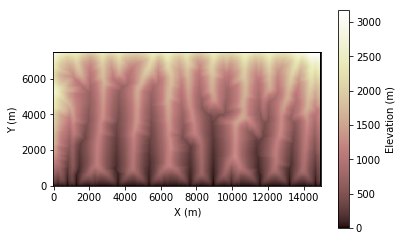

In [6]:
imshow_grid(mg, 'topographic__elevation', grid_units=('m', 'm'),
               var_name='Elevation (m)')


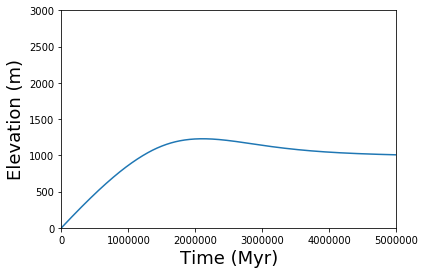

In [7]:
#Plot and save mean elevation through time

plt.figure(1)    
plt.plot(timeArray, meanElevationArray)
axes = plt.gca()
axes.set_xlim([0,5000000])
axes.set_ylim([0,3000])
plt.xlabel('Time (Myr)', fontsize=18)
plt.ylabel('Elevation (m)', fontsize=18)

meanElevationFigName = filenameHeader + "meanElevation.png"
plt.savefig(meanElevationFigName)

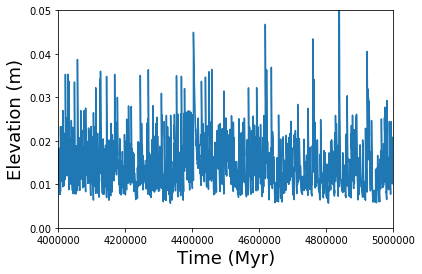

In [14]:
#Plot and save max elevation change through time

plt.figure(2)    
plt.plot(timeArray, zDiffArray)
axes = plt.gca()
axes.set_xlim([4000000,5000000])
axes.set_ylim([0,.05])
plt.xlabel('Time (Myr)', fontsize=18)
plt.ylabel('Elevation (m)', fontsize=18)

maxElevationChangeFigName = filenameHeader + "maxElevationChange.png"
plt.savefig(meanElevationFigName)

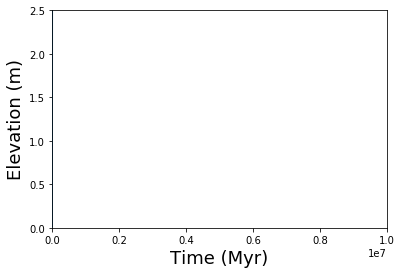

In [9]:
#Plot and save max elevation through time

plt.figure(3)    
plt.plot(timeArray, maxElevationArray)
axes = plt.gca()
axes.set_xlim([0,10000000])
axes.set_ylim([0,2.5])
plt.xlabel('Time (Myr)', fontsize=18)
plt.ylabel('Elevation (m)', fontsize=18)

maxElevationFigName = filenameHeader + "maxElevation.png"
plt.savefig(maxElevationFigName)

In [11]:
filename = filenameHeader + "k_" + str(K_sp) + "_" + "m_" + str(m_sp) + "_" + "n_"+ str(n_sp) + "_" +\
    "LinDiffusion_" + str(k_d) + "_" + str(widthKm) + "x" + str(lengthKm)+ "km_" + "30mRes" + ".txt"

write_esri_ascii(filename, mg, 'topographic__elevation')

['Fastscape_5Myr_100yrTimeStep_onemmyrk_1e-05_m_0.5_n_1.0_LinDiffusion_0.05_15x7km_30mRes.txt']

In [12]:
#Write out text files for mean elevation, max elevation, and time

meanElevavationFilename = filenameHeader + "k_" + str(K_sp) + "_" + "m_" + str(m_sp) + "_" \
    + "n_"+ str(n_sp) + "_" + "LinDiffusion_" + str(k_d) + "_" + str(widthKm) \
    + "x" + str(lengthKm)+ "km_" + "30mRes" + "_meanElevation" + ".txt"

np.savetxt(meanElevavationFilename, meanElevationArray, delimiter=" ")


maxElevavationFilename = filenameHeader + "k_" + str(K_sp) + "_" + "m_" + str(m_sp) + "_" \
    + "n_"+ str(n_sp) + "_" + "LinDiffusion_" + str(k_d) + "_" + str(widthKm) \
    + "x" + str(lengthKm)+ "km_" + "30mRes" + "_maxElevation" + ".txt"

np.savetxt(maxElevavationFilename, maxElevationArray, delimiter=" ")


timeFilename = filenameHeader + "k_" + str(K_sp) + "_" + "m_" + str(m_sp) + "_" \
    + "n_"+ str(n_sp) + "_" + "LinDiffusion_" + str(k_d) + "_" + str(widthKm) \
    + "x" + str(lengthKm)+ "km_" + "30mRes" + "_timeMyr" + ".txt"

np.savetxt(timeFilename, timeArray, delimiter=" ")